<a class="anchor" id="import">

## 1. Import 
    
</a>

<a class="anchor" id="libraries">

## 1.1 Import libraries
    
</a>

In [2072]:
#! pip install minisom

In [2183]:
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib
from minisom import MiniSom
## Import Matplotlib functions to create MiniSOM visualizations

from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.lines import Line2D
import seaborn as sns

from matplotlib import __version__ as mplver

from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split


import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Display all the df and results
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  
pd.set_option('display.colheader_justify', 'center')  

<a class="anchor" id="dataset">

## 1.2 Import the dataset
    
</a>

In [2074]:
# Read the CSV file
df = pd.read_csv("data_beforeclustering.csv")

In [2075]:
df_backup=df

In [2076]:
df=df.set_index("customer_id")

In [2077]:
df.head()

customer_age  vendor_count  product_count  is_chain  first_order  last_order last_promo payment_method  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   Sunday    Monday    Tuesday  Wednesday  Thursday   Friday   Saturday    HR_0      HR_1     HR_2    HR_3      HR_4      HR_5      HR_6      HR_7      HR_8      HR_9      HR_10     HR_11     HR_12     HR_13     HR_14     HR_15     HR_16    HR_17     HR_18     HR_19     HR_20    HR_21     HR_22     HR_23   Sum_of_Orders  early_morning(0h-5h)  morning(6h-11h)  afternoon(12h-17h)  night(18h-23h)       age_group         recency  active_period  frequency  total_spend  cuisine_diversity  customer_city  Weekdays  Weekends  Main Courses  Snacks and Street Food  Desserts and Beverages  Healthy and Special Diets    Other   enc_payment_method_CARD  \
customer_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1b8f824d5e    -1.338050     -0.399572     -0.069431         1     -1.183266    -2.691007   DELIVERY       DIGI        -0.436462   -0.464162    -0.285297    -0.143166      -0.244386       -0.236288     -0.186047    -0.173833     4.038654    -0.3127      -0.330489       -0.177102      -0.327942          -0.266515         -0.194024  0.496912 -0.567359 -0.585044 -0.600057  -0.644372 -0.628135  0.293126 -0.166196 -0.173983 -0.1876 -0.24087 -0.238856 -0.227738 -0.211093 -0.219166 -0.261504 -0.332740 -0.391635 -0.418192 -0.387664 -0.375187 -0.367683 -0.392931 -0.417112 -0.42601  2.010814 -0.328968 -0.268484 -0.20898 -0.171644 -0.166682   -0.498308          -0.455621          -0.792308          -1.063637          2.646362        Teenagers (15-19)  2.691007   -1.160188     1.557000   -0.194602       -0.860516             2       -2.236180  2.270781    0.144187          -0.340593               -0.328655                -0.173833          -0.327942            0.0             
5d272b9dcb    -1.479296     -0.399572     -0.583074         1     -1.183266    -2.691007   DISCOUNT       DIGI         0.745882   -0.151007    -0.285297    -0.143166      -0.244386       -0.236288     -0.186047    -0.173833    -0.232730    -0.3127      -0.330489       -0.177102      -0.327942          -0.266515         -0.194024  0.496912 -0.567359 -0.585044 -0.600057  -0.644372 -0.628135  0.293126 -0.166196 -0.173983 -0.1876 -0.24087 -0.238856 -0.227738 -0.211093 -0.219166 -0.261504 -0.332740  0.860332  0.737900 -0.387664 -0.375187 -0.367683 -0.392931 -0.417112 -0.42601 -0.391899 -0.328968 -0.268484 -0.20898 -0.171644 -0.166682   -0.498308          -0.455621           2.138564          -1.063637         -0.628169        Teenagers (15-19)  2.691007   -1.160188     1.557000   -0.442515       -0.177250             8       -2.236180  2.270781   -0.180168          -0.340593               -0.328655                -0.173833          -0.327942            0.0             
f6d1b2ba63     1.486865     -0.780775     -0.583074         1     -1.183266    -2.691007   DISCOU

<a class="anchor" id="clustering">

# 2. Clustering
    
</a>

<a class="anchor" id="select">

## 2.1 Feature Selection
    
</a>

In [2078]:
df.columns.values

array(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
       'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
       'HR_22', 'HR_23', 'Sum_of_Orders', 'early_morning(0h-5h)',
       'morning(6h-11h)', 'afternoon(12h-17h)', 'night(18h-23h)',
       'age_group', 'recency', 'active_period', 'frequency',
       'total_spend', 'cuisine_diversity', 'customer_city', 'Weekdays',
       'Weekends', 'Main Courses

In [2079]:
# Splitting feature names into groups
metric_features = ['customer_age', 'vendor_count', 'product_count','first_order', 'last_order',
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe','CUI_Chicken Dishes', 
                   'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy','CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes','CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai',
                   'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7','HR_8', 'HR_9', 'HR_10', 
                   'HR_11', 'HR_12', 'HR_13', 'HR_14','HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21','HR_22', 'HR_23', 
                   'early_morning(0h-5h)', 'morning(6h-11h)','afternoon(12h-17h)', 'night(18h-23h)',
                   'Sum_of_Orders', 'recency', 'active_period', 'frequency','total_spend', 'cuisine_diversity',
                   'Weekdays','Weekends', 
                   'Main Courses','Snacks and Street Food', 'Desserts and Beverages','Healthy and Special Diets', 'Other'
                   ]

non_metric_features = df.columns[df.columns.str.startswith('enc_')].tolist() 
unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features) ]

# Display
print('metric_features:', metric_features)
print('\nnon_metric_features:', non_metric_features)
print('\nunused_features:', unused_features)

metric_features: ['customer_age', 'vendor_count', 'product_count', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)', 'afternoon(12h-17h)', 'night(18h-23h)', 'Sum_of_Orders', 'recency', 'active_period', 'frequency', 'total_spend', 'cuisine_diversity', 'Weekdays', 'Weekends', 'Main Courses', 'Snacks and Street Food', 'Desserts and Beverages', 'Healthy and Special Diets', 'Other']

non_metric_features: ['enc_payment_method_CARD', 'enc_payment_metho

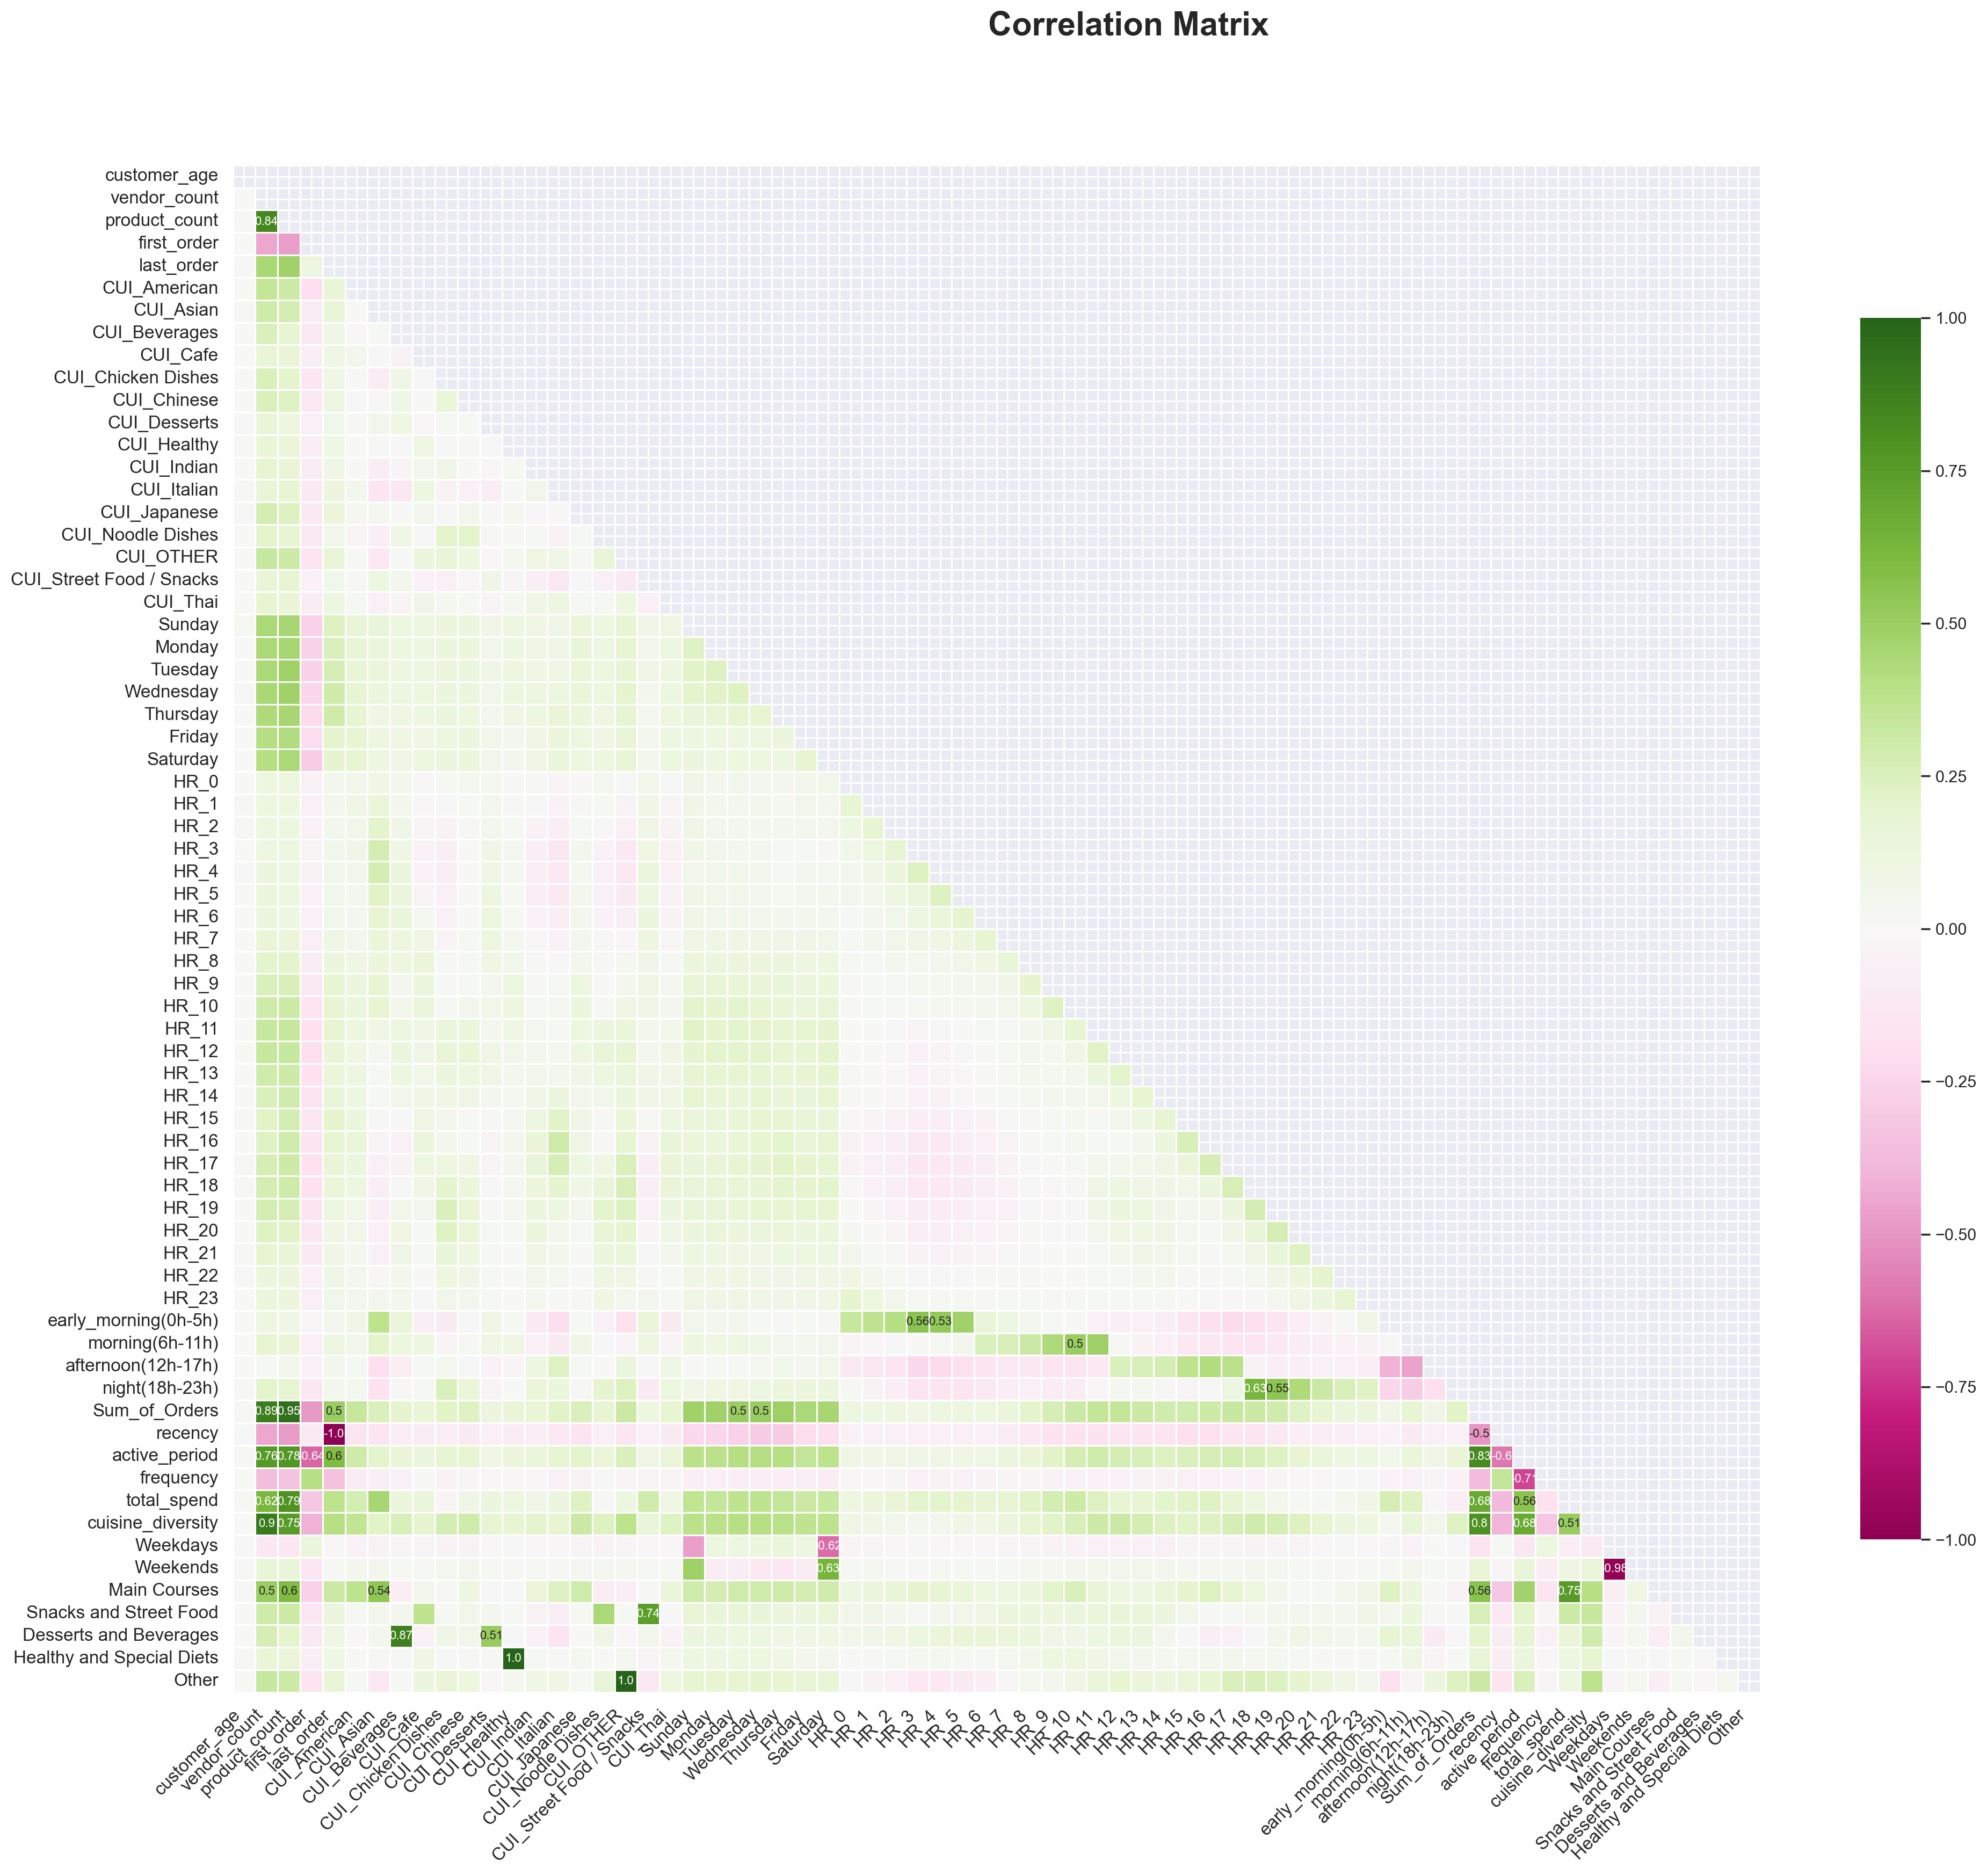

In [2080]:
fig = plt.figure(figsize=(24, 18))  # Increased size for clarity

# Compute Spearman correlation
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Mask for upper triangle and annotations threshold
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))  # Annotate only significant correlations

# Mask upper triangle
matrix = np.triu(np.ones_like(corr, dtype=bool))

# Customize the heatmap
sns.heatmap(
    data=corr,
    annot=annot,                   # Show annotations
    mask=matrix,                   # Apply mask to hide upper triangle
    cmap='PiYG',               # Adjust colormap for better clarity
    fmt='',                        # Avoid formatting issues
    annot_kws={"size": 8},        # Font size for annotations
    vmin=-1, vmax=1, center=0,     # Set limits for the colormap
    square=True, linewidths=.5,    # Keep square cells with a border
    cbar_kws={"shrink": 0.8}       # Shrink color bar for better fit
)

# Title and labels
fig.subplots_adjust(top=0.9)       # Adjust layout to fit the title
fig.suptitle("Correlation Matrix", fontsize=22, weight='bold')  # Bold, larger title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()

Drop from dataset HR, CUI and DOW variables since we have them explicit in other features

- HR - Time periods
- CUI - Types of cuisine
- DOW - Week days and Weekends

In [2081]:
# List of columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                   'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
                   'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
                   'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe','CUI_Chicken Dishes', 
                   'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy','CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes','CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

metric_features = [i for i in metric_features if i not in columns_to_drop]

df=df.drop(columns=columns_to_drop)

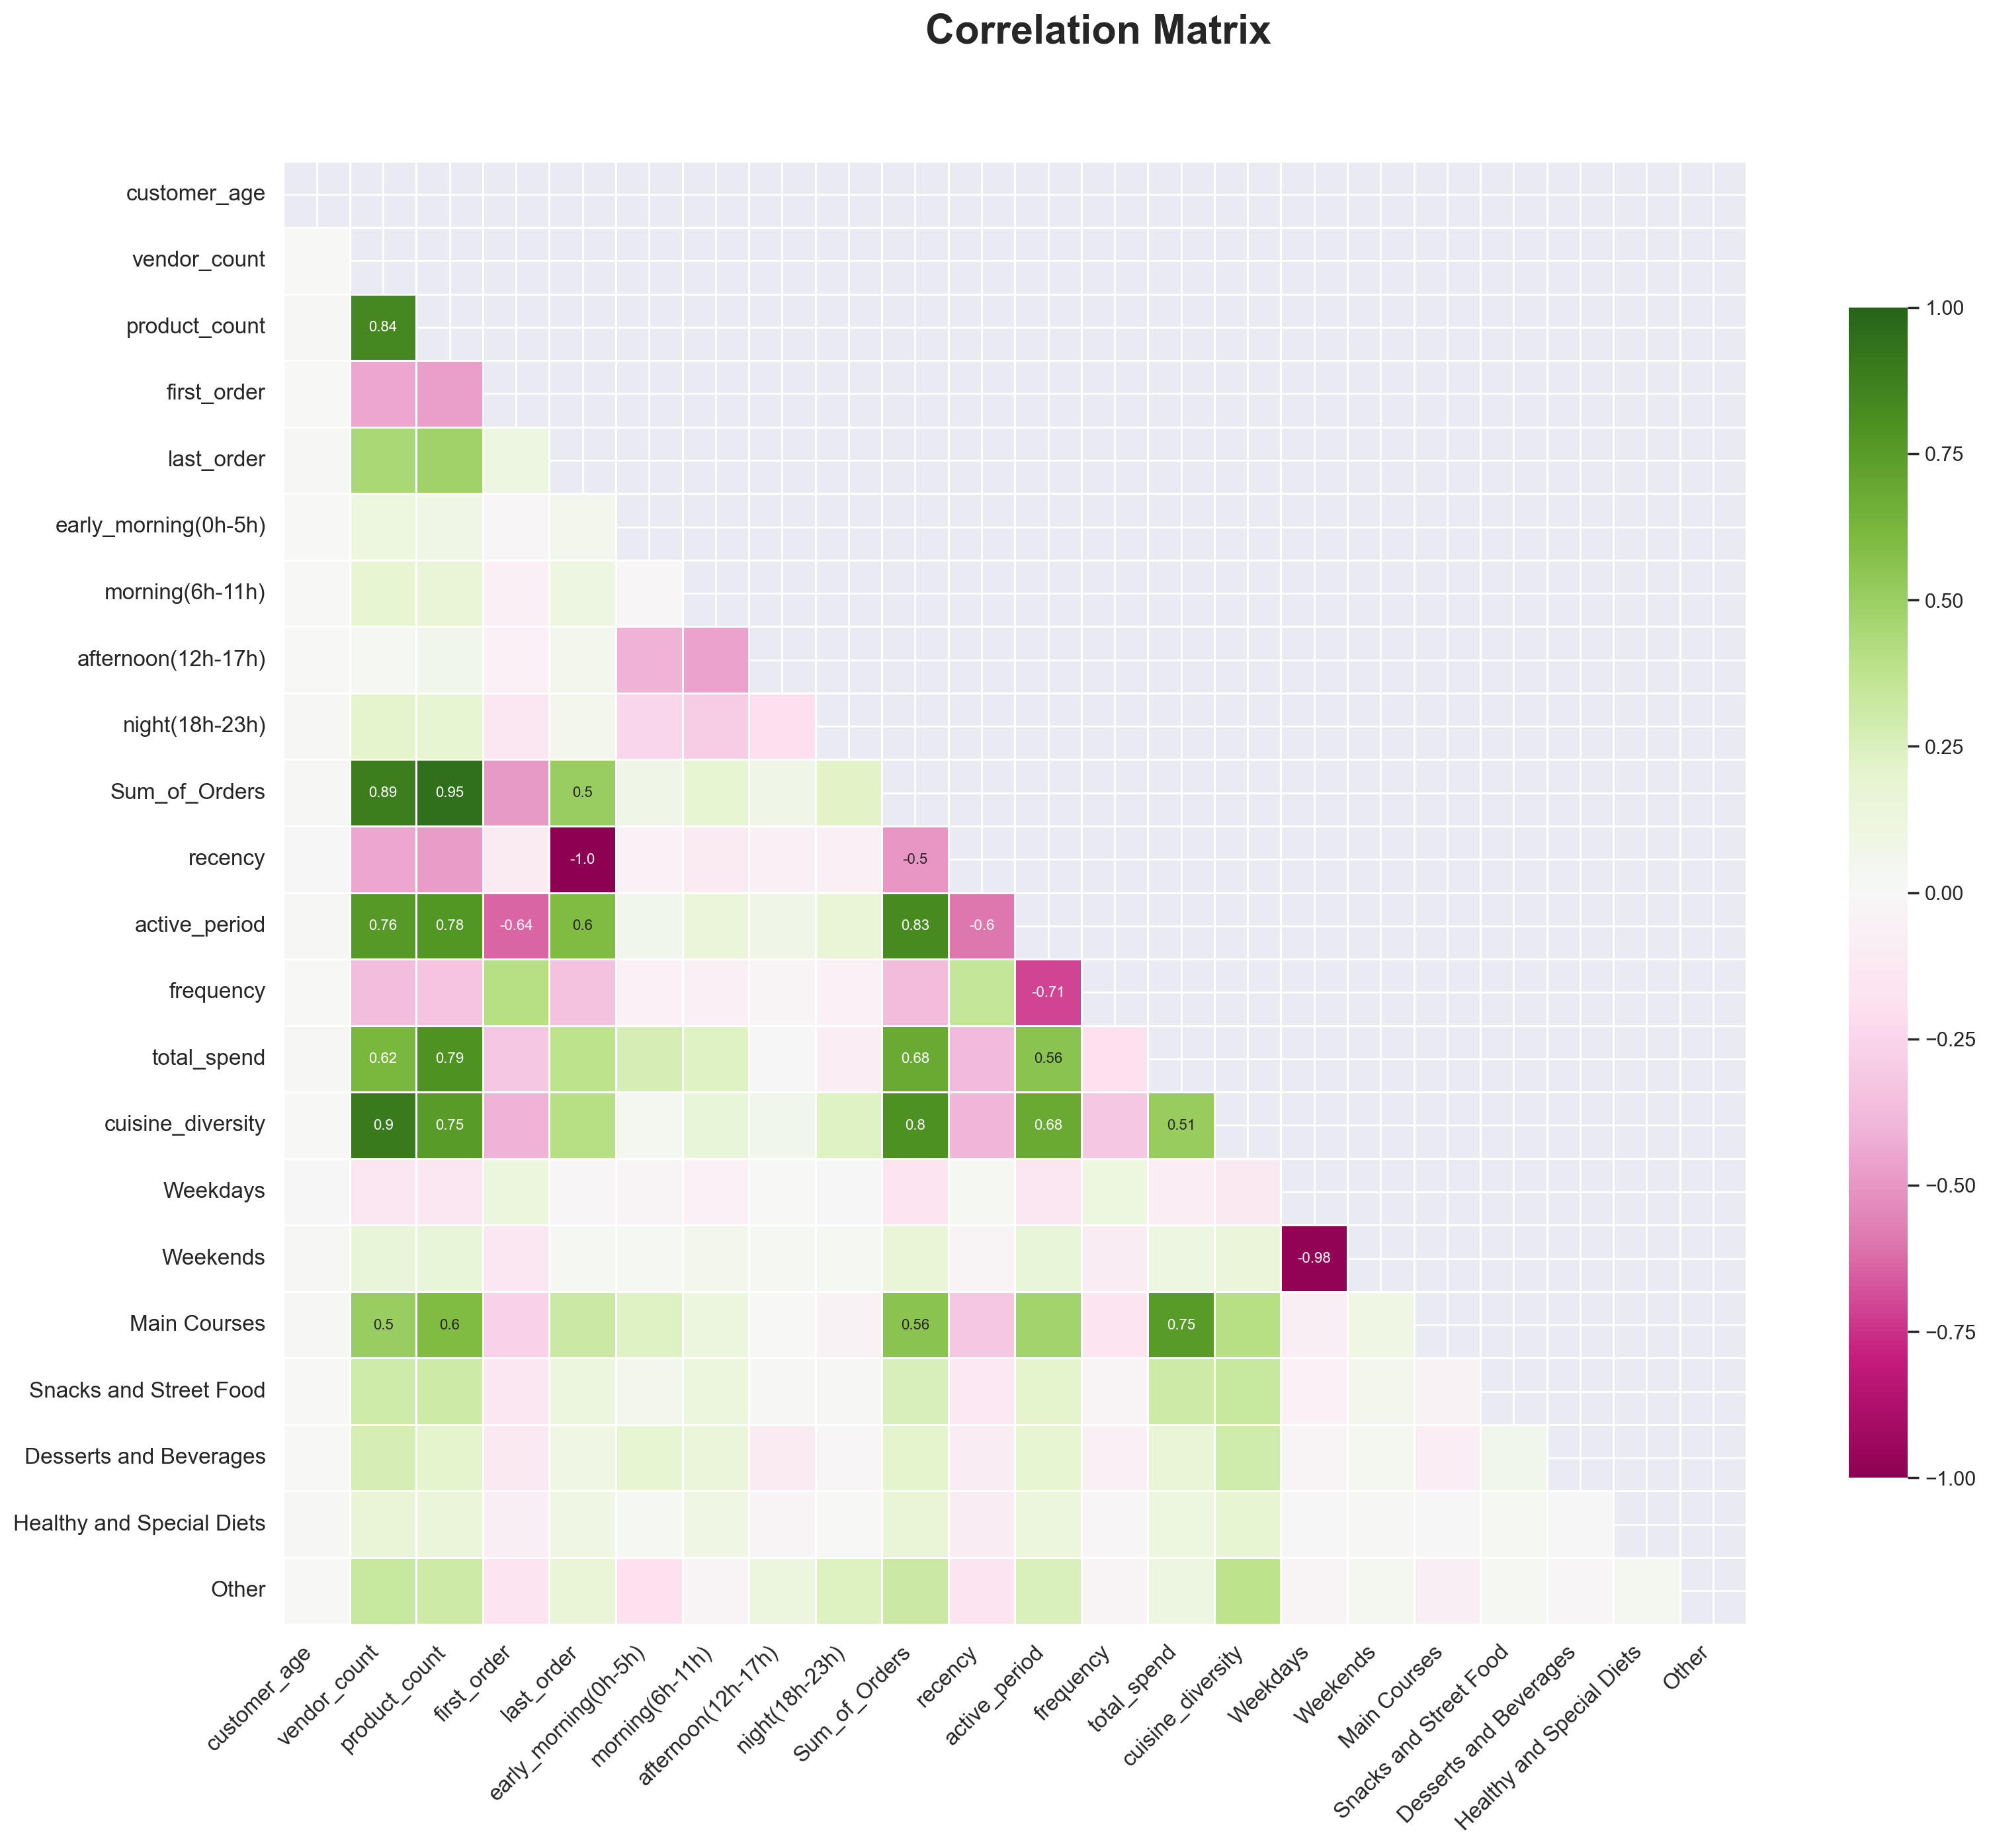

In [2082]:
fig = plt.figure(figsize=(20, 14))  # Increased size for clarity

# Compute Spearman correlation
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Mask for upper triangle and annotations threshold
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))  # Annotate only significant correlations

# Mask upper triangle
matrix = np.triu(np.ones_like(corr, dtype=bool))

# Customize the heatmap
sns.heatmap(
    data=corr,
    annot=annot,                   # Show annotations
    mask=matrix,                   # Apply mask to hide upper triangle
    cmap='PiYG',               # Adjust colormap for better clarity
    fmt='',                        # Avoid formatting issues
    annot_kws={"size": 8},        # Font size for annotations
    vmin=-1, vmax=1, center=0,     # Set limits for the colormap
    square=True, linewidths=.5,    # Keep square cells with a border
    cbar_kws={"shrink": 0.8}       # Shrink color bar for better fit
)

# Title and labels
fig.subplots_adjust(top=0.9)       # Adjust layout to fit the title
fig.suptitle("Correlation Matrix", fontsize=22, weight='bold')  # Bold, larger title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()

In [2083]:
# Select variables according to their correlations
# Updating metric_features
metric_features.remove('vendor_count') #cuisine_diversity (0.90)
metric_features.remove('product_count') #Sum_of_orders (0.95)
metric_features.remove('last_order') #recency (-1.0)
#Time Periods
metric_features.remove('early_morning(0h-5h)')
metric_features.remove('morning(6h-11h)')
metric_features.remove('afternoon(12h-17h)')
metric_features.remove('night(18h-23h)')
#Type of Meal
metric_features.remove('Main Courses')
metric_features.remove('Snacks and Street Food')
metric_features.remove('Desserts and Beverages')
metric_features.remove('Healthy and Special Diets')
metric_features.remove('Other')


unused_features.extend(['vendor_count','product_count','last_order',
                        'early_morning(0h-5h)','morning(6h-11h)','afternoon(12h-17h)','night(18h-23h)',
                        'Main Courses','Snacks and Street Food','Desserts and Beverages','Healthy and Special Diets','Other'])

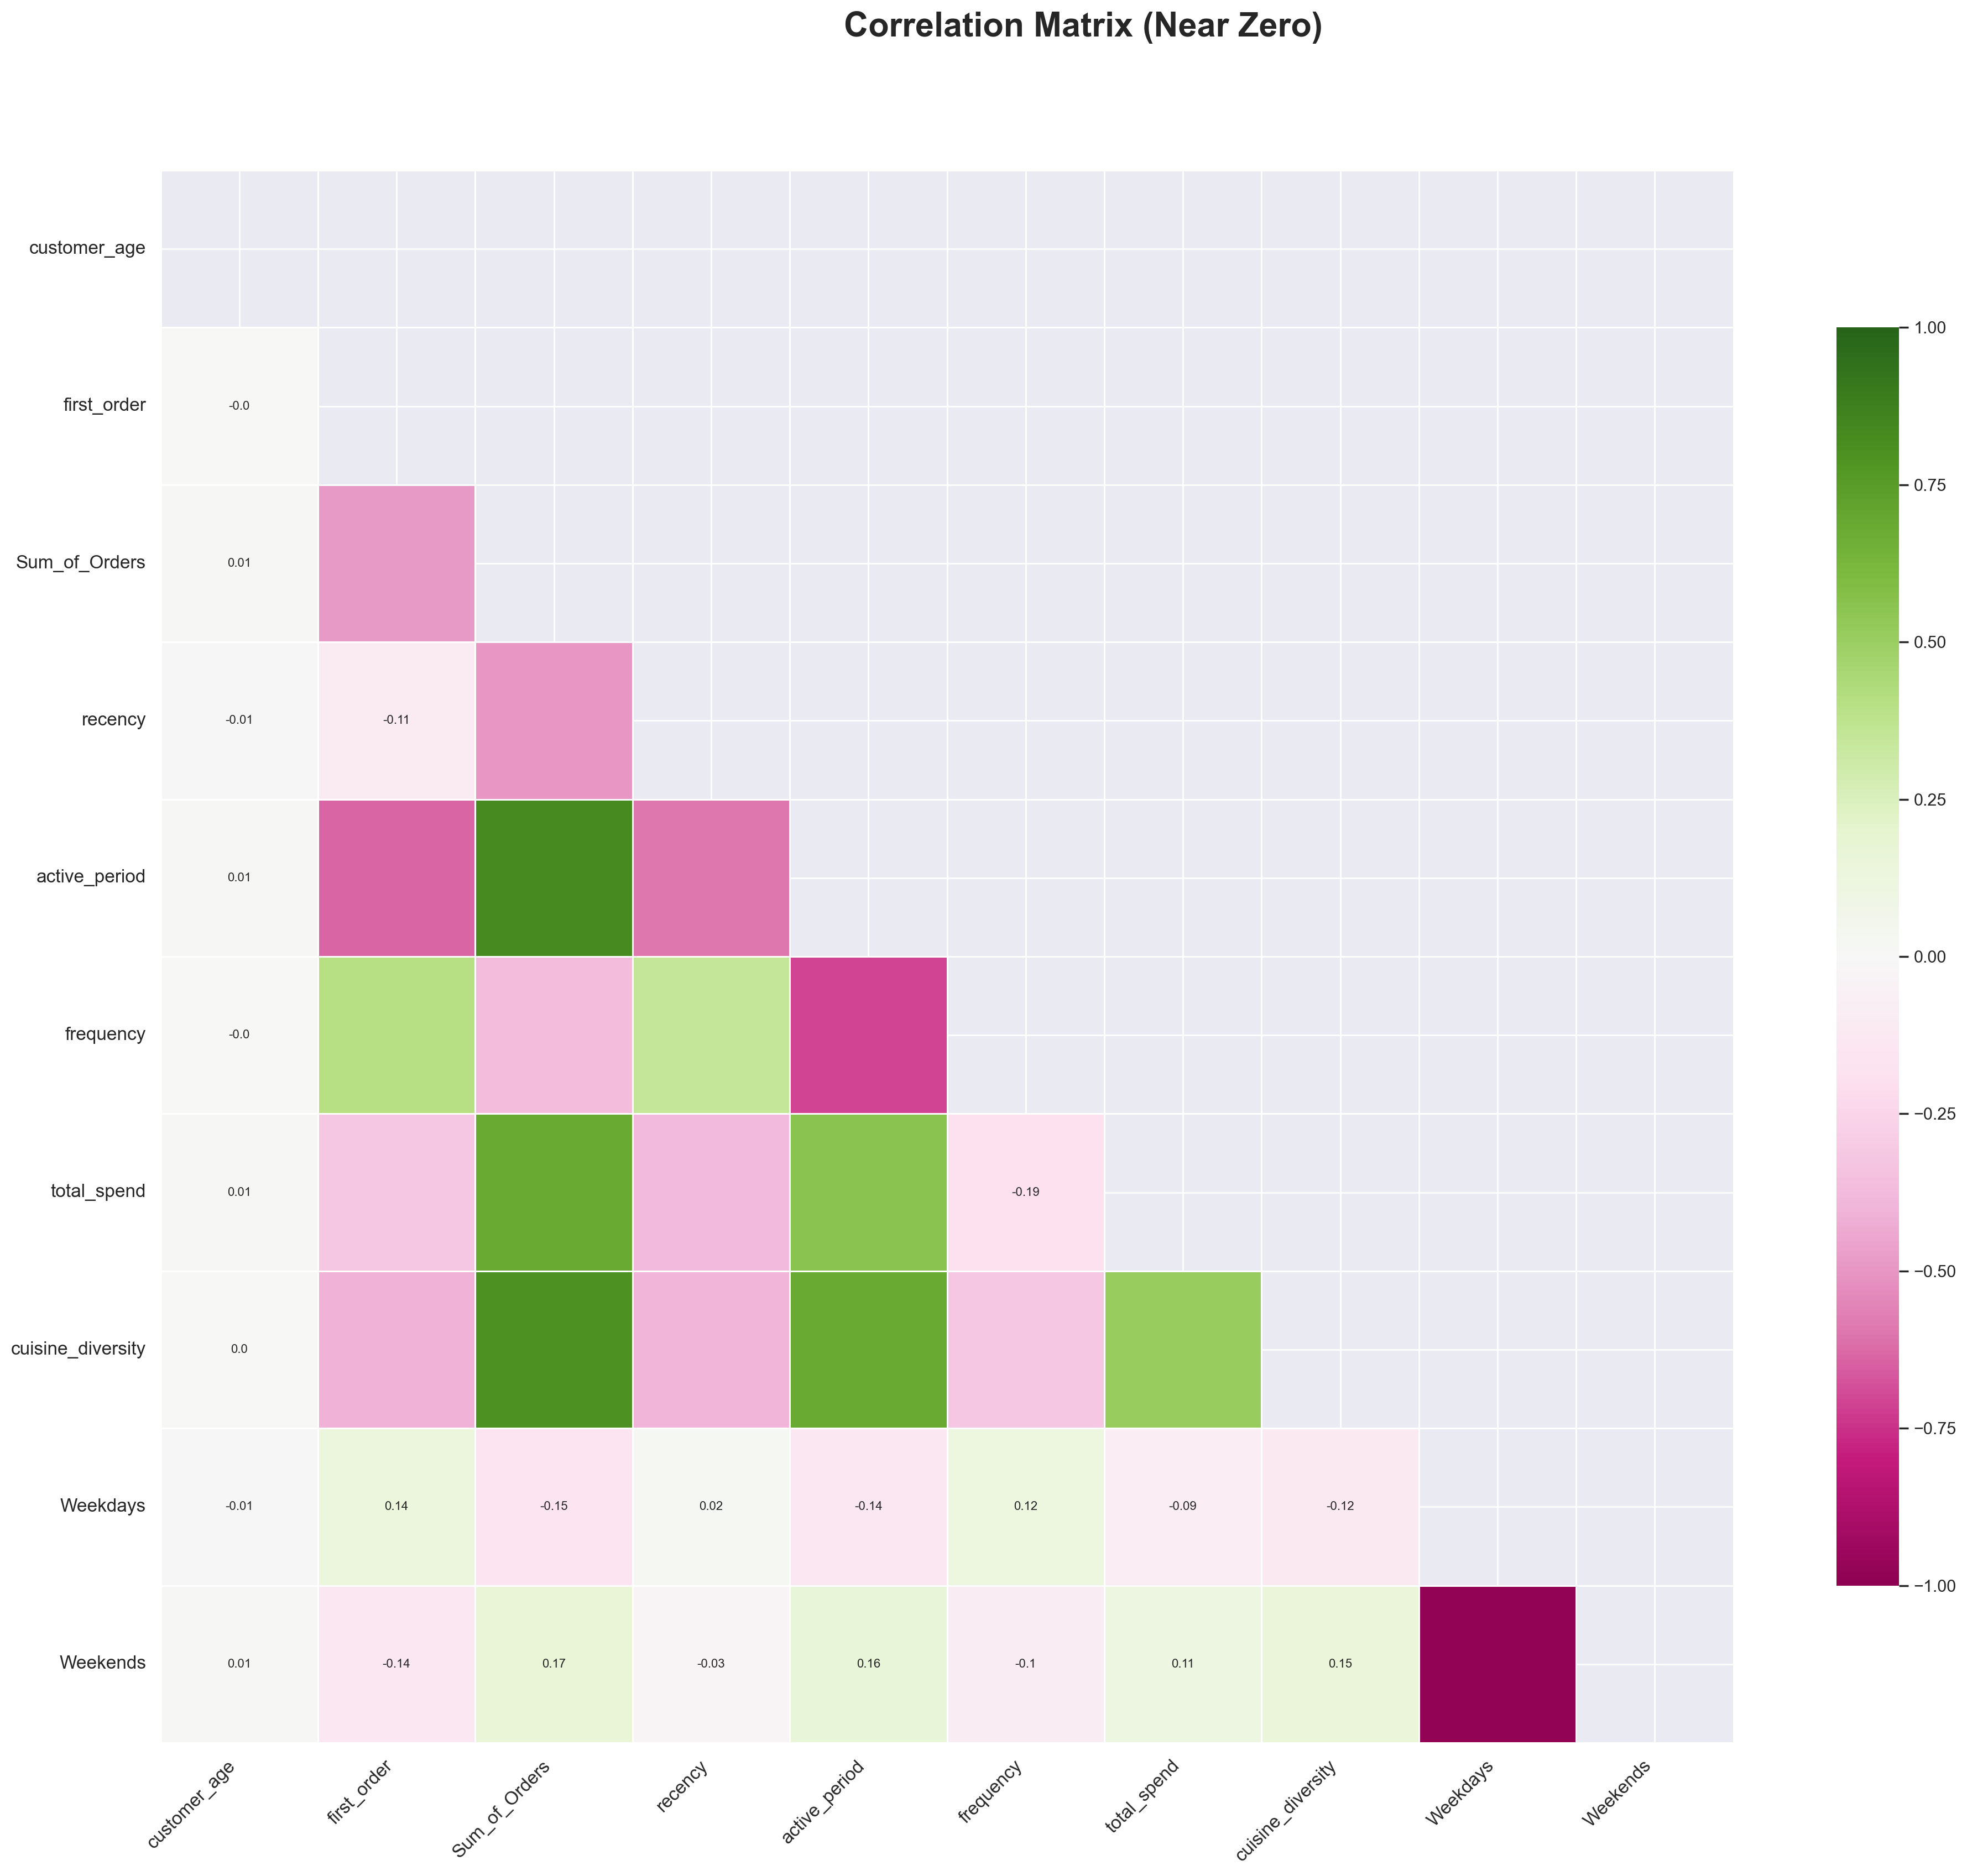

In [2084]:
fig = plt.figure(figsize=(24, 18))  # Increased size for clarity

# Compute Spearman correlation
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Mask for annotations near 0 (e.g., absolute correlation < 0.2)
mask_annot = (np.absolute(corr.values) < 0.2)  # You can adjust the threshold to be closer to 0
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))  # Annotate only near-zero correlations

# Mask upper triangle
matrix = np.triu(np.ones_like(corr, dtype=bool))

# Customize the heatmap
sns.heatmap(
    data=corr,
    annot=annot,                   # Show annotations for near-zero correlations
    mask=matrix,                   # Apply mask to hide upper triangle
    cmap='PiYG',                   # Adjust colormap for better clarity
    fmt='',                        # Avoid formatting issues
    annot_kws={"size": 8},         # Font size for annotations
    vmin=-1, vmax=1, center=0,     # Set limits for the colormap
    square=True, linewidths=.5,    # Keep square cells with a border
    cbar_kws={"shrink": 0.8}       # Shrink color bar for better fit
)

# Title and labels
fig.subplots_adjust(top=0.9)       # Adjust layout to fit the title
fig.suptitle("Correlation Matrix (Near Zero)", fontsize=22, weight='bold')  # Bold, larger title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Display the heatmap
plt.show()


* Customer_age does not seem to have a relevant correlation to any variable

In [2085]:
metric_features.remove('customer_age')
unused_features.extend(['customer_age'])

<a class="anchor" id="DBSCAN">

## 2.2 DBSCAN for Outliers
    
</a>

#### Defining eps and min_samples:
- **MinPts**: As a rule of thumb, **minPts = 2 x dim** can be used.

- **ε**: The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the kth (k = minPts - 1) nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an **"elbow"**: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. 

- The assumption is that for points in a cluster, **their k nearest neighbors are at roughly the same distance**. Noise points have their k-th nearest neighbors at farther distance

In [2086]:
# Finding dim
dim=len(metric_features)
print(f'dim = {dim}')
print(f'MinPts = {2*dim}')

dim = 9
MinPts = 18


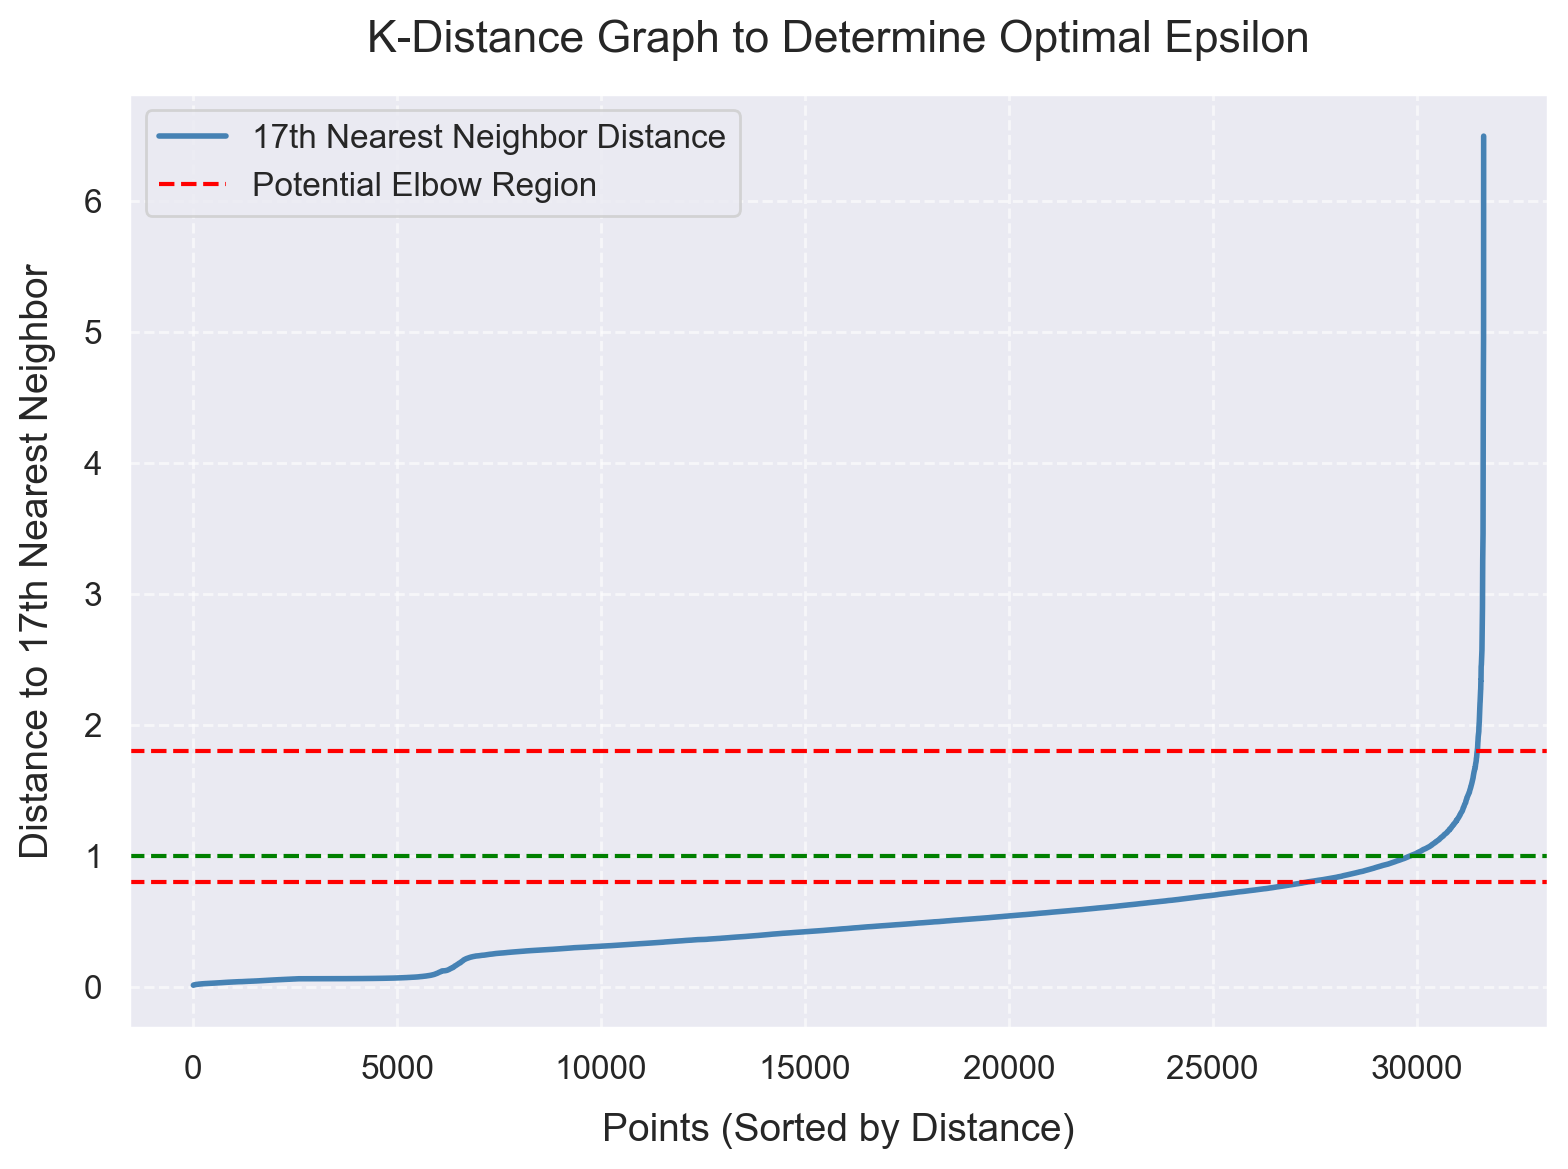

In [2093]:
# Compute k-distances
n_neighbors = (dim*2)-1  # Number of neighbors to consider (MinPts-1)
neigh = NearestNeighbors(n_neighbors=n_neighbors)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])

# Sort distances for plotting
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 6)) 
plt.plot(distances, color='steelblue', linewidth=2, label=f"{n_neighbors}th Nearest Neighbor Distance")

# Add labels and title
plt.title("K-Distance Graph to Determine Optimal Epsilon", fontsize=16, pad=15)
plt.xlabel("Points (Sorted by Distance)", fontsize=14, labelpad=10)
plt.ylabel(f"Distance to {n_neighbors}th Nearest Neighbor", fontsize=14, labelpad=10)

# Add a grid
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Highlight the "elbow" area
plt.axhline(y=1.8, color='red', linestyle="--", linewidth=1.5, label="Potential Elbow Region")
plt.axhline(y=0.8, color='red', linestyle="--", linewidth=1.5)
plt.axhline(y=1, color='green', linestyle="--", linewidth=1.5)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [2092]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=dim*2, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 7


In [2094]:
Counter(dbscan_labels)

Counter({1: 28515, 0: 2042, -1: 677, 3: 201, 2: 138, 5: 52, 4: 23})

In [2095]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

first_order  Sum_of_Orders   recency  active_period  frequency  total_spend  cuisine_diversity  Weekdays  Weekends  dbscan_labels
customer_id                                                                                                                                   
1b8f824d5e   -1.183266     -0.498308     2.691007   -1.160188     1.557000   -0.194602       -0.860516      -2.236180  2.270781        0      
5d272b9dcb   -1.183266     -0.498308     2.691007   -1.160188     1.557000   -0.442515       -0.177250      -2.236180  2.270781        0      
f6d1b2ba63   -1.183266     -0.498308     2.691007   -1.160188     1.557000   -0.699144       -0.860516      -2.236180  2.270781        0      
180c632ed8   -1.183266     -0.498308     2.647970   -1.126053     0.754685   -0.125894       -0.177250      -0.654043  0.674016        1      
4eb37a6705   -1.183266     -0.498308     2.647970   -1.126053     0.754685    0.486325       -0.177250      -0.654043  0.674016        1

In [2096]:
# Detecting noise (potential outliers)
num_noise = len(df_concat.loc[df_concat['dbscan_labels'] == -1])
total_points = len(df_concat)
percent_outliers = (num_noise / total_points) * 100

print(num_noise)
print(f"Percentage of potencial outliers: {percent_outliers:.2f}%")

677
Percentage of potencial outliers: 2.14%


In [2097]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [2098]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2552


C:\Users\anama\AppData\Local\Temp\ipykernel_3028\1461256281.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


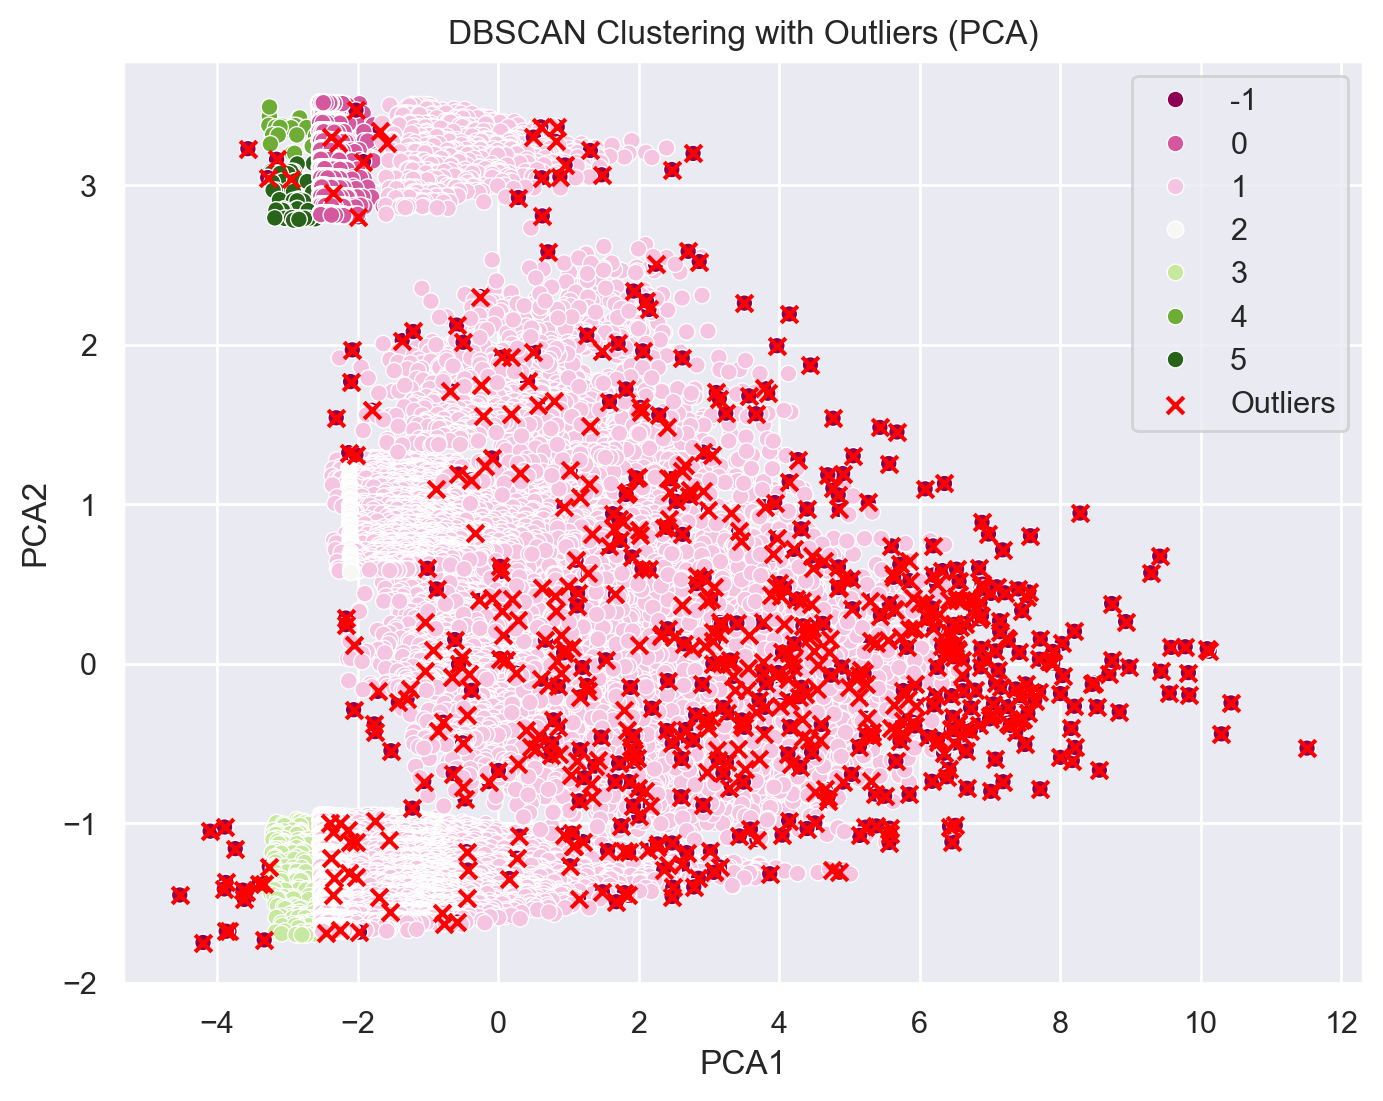

In [2099]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_concat[metric_features])  # Use your features for clustering

# Create a new dataframe with PCA components and cluster labels
df_concat['PCA1'] = pca_result[:, 0]
df_concat['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA components with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_concat, x='PCA1', y='PCA2', hue='dbscan_labels', palette='PiYG', legend='full')

# Highlight outliers
outliers = df_concat[df_concat['dbscan_labels'] == -1]
plt.scatter(outliers['PCA1'], outliers['PCA2'], color='red', label='Outliers', marker='x')

plt.title('DBSCAN Clustering with Outliers (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [2100]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers 
df = df[dbscan_labels!=-1].copy()

<a class="anchor" id="perspect">

## 2.3 Clustering by perspectives
    
</a>

In [2101]:
# 1. Value-Based Segmentation
value_based_features = ['total_spend', 'frequency', 'recency','active_period']

# 2. Behaviour-Based Segmentation
behaviour_based_features = ['first_order','cuisine_diversity','Weekdays', 'Weekends','Sum_of_Orders']


df_value = df[value_based_features].copy()
df_beh = df[behaviour_based_features].copy()



In [2102]:
# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=40,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [2103]:
def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()


In [2104]:
def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)

In [2105]:
def get_r2_scores(df, feats, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        df_concat = pd.concat([df, 
                               pd.Series(labels, name='labels', index=df.index)], axis=1)  

        r2_clust[n] = get_rsq(df_concat, feats, 'labels' )
    return r2_clust

### 1. Value-Based 

In [2033]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=40, random_state=1)
    kmclust.fit(df_value)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    #Skip nclus == 1
    if nclus == 1:
        continue
    
    #Create a figure
    fig = plt.figure(figsize=(13, 7))

    #Initialize the KMeans object with n_clusters value and a random generator
    #seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=40, random_state=1)
    cluster_labels = kmclust.fit_predict(df_value)

    #The silhouette_score gives the average value for all the samples.
    #This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_value, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_value, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        #Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        #Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        #Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    #The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    #The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    #The (nclus+1)*10 is for inserting blank space between silhouette
    #plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_value) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [2106]:
#Obtaining the R² scores for each cluster solution on value based variables
r2_scores = {}

r2_scores['kmeans'] = get_r2_scores(df_value, value_based_features, kmeans)

# for linkage in ['complete', 'average', 'single', 'ward']:
#     r2_scores[linkage] = get_r2_scores(
#         df_value,                 # data
#         value_based_features,   # features of perspective
#         # use HClust, changing the linkage at each iteration
#         hierarchical.set_params(linkage=linkage) 
#     )

In [2107]:
r2_scores_df = pd.DataFrame(r2_scores)
r2_scores_df

kmeans 
2  0.473947
3  0.620719
4  0.703978
5  0.775453
6  0.817332
7  0.838302
8  0.855672
9  0.867354

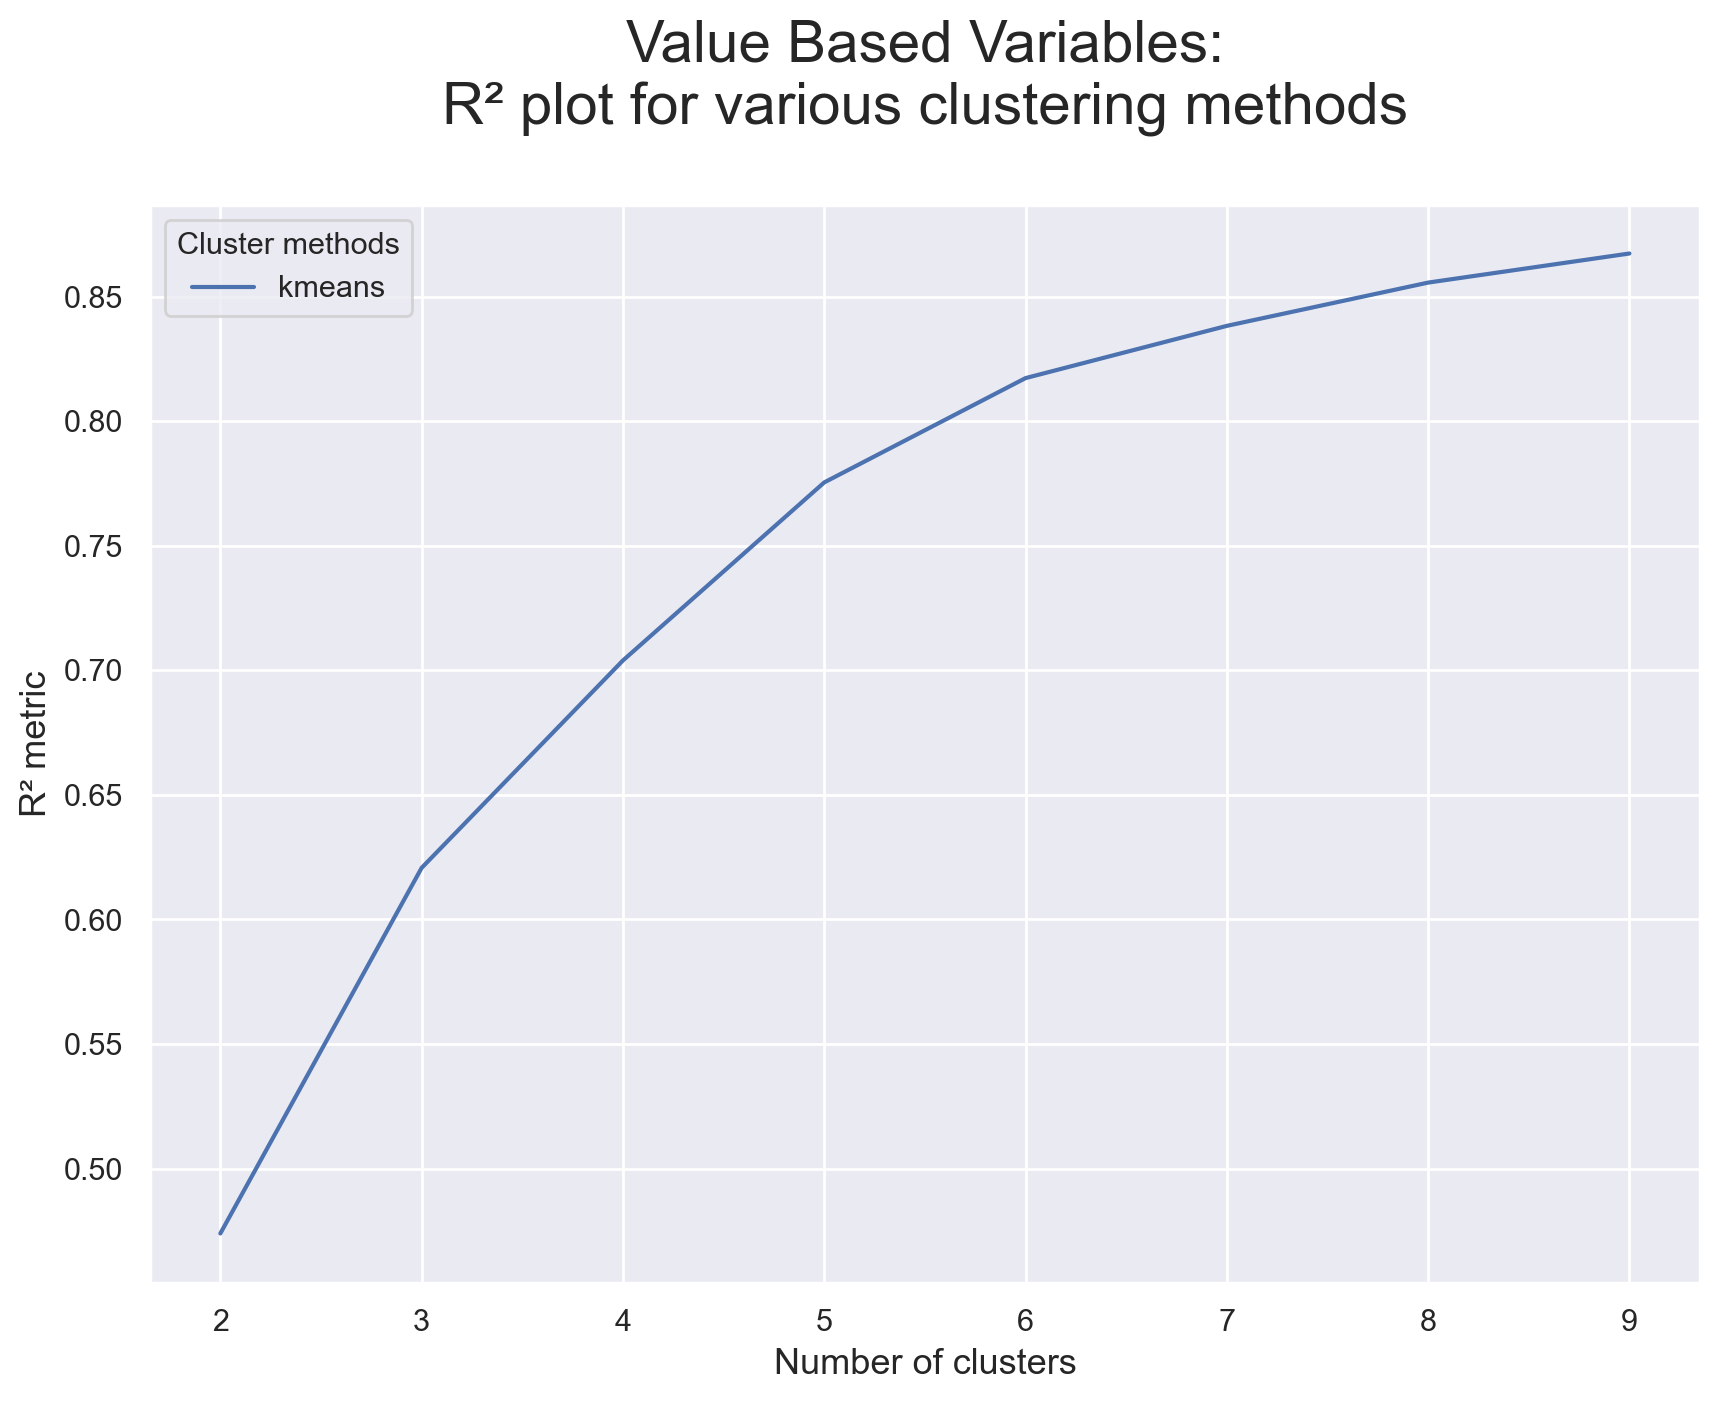

In [2108]:
# Visualizing the R² scores for each cluster solution on value based variables
r2_scores_df.plot.line(figsize=(10,7))

plt.title("Value Based Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13) 
plt.show()      

## 2. Behaviour-Based 

In [ ]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=40, random_state=1)
    kmclust.fit(df_beh)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    #Skip nclus == 1
    if nclus == 1:
        continue
    
    #Create a figure
    fig = plt.figure(figsize=(13, 7))

    #Initialize the KMeans object with n_clusters value and a random generator
    #seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=40, random_state=1)
    cluster_labels = kmclust.fit_predict(df_value)

    #The silhouette_score gives the average value for all the samples.
    #This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_value, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_value, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        #Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        #Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        #Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    #The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    #The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    #The (nclus+1)*10 is for inserting blank space between silhouette
    #plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_value) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [2109]:
# Obtaining the R² scores for each cluster solution on Behaviour based variables
r2_scores_beh = {}

r2_scores_beh['kmeans'] = get_r2_scores(df_beh,behaviour_based_features, kmeans)

# for linkage in ['complete', 'average', 'single', 'ward']:
#     r2_scores_beh[linkage] = get_r2_scores(
#         df_beh,                 # data
#         behaviour_based_features,   # features of perspective
#         # use HClust, changing the linkage at each iteration
#         hierarchical.set_params(linkage=linkage) 
#     ) 

In [2110]:
r2_scores_df_beh = pd.DataFrame(r2_scores_beh)
r2_scores_df_beh

kmeans 
2  0.312726
3  0.543618
4  0.633630
5  0.710268
6  0.750182
7  0.782401
8  0.802017
9  0.818008

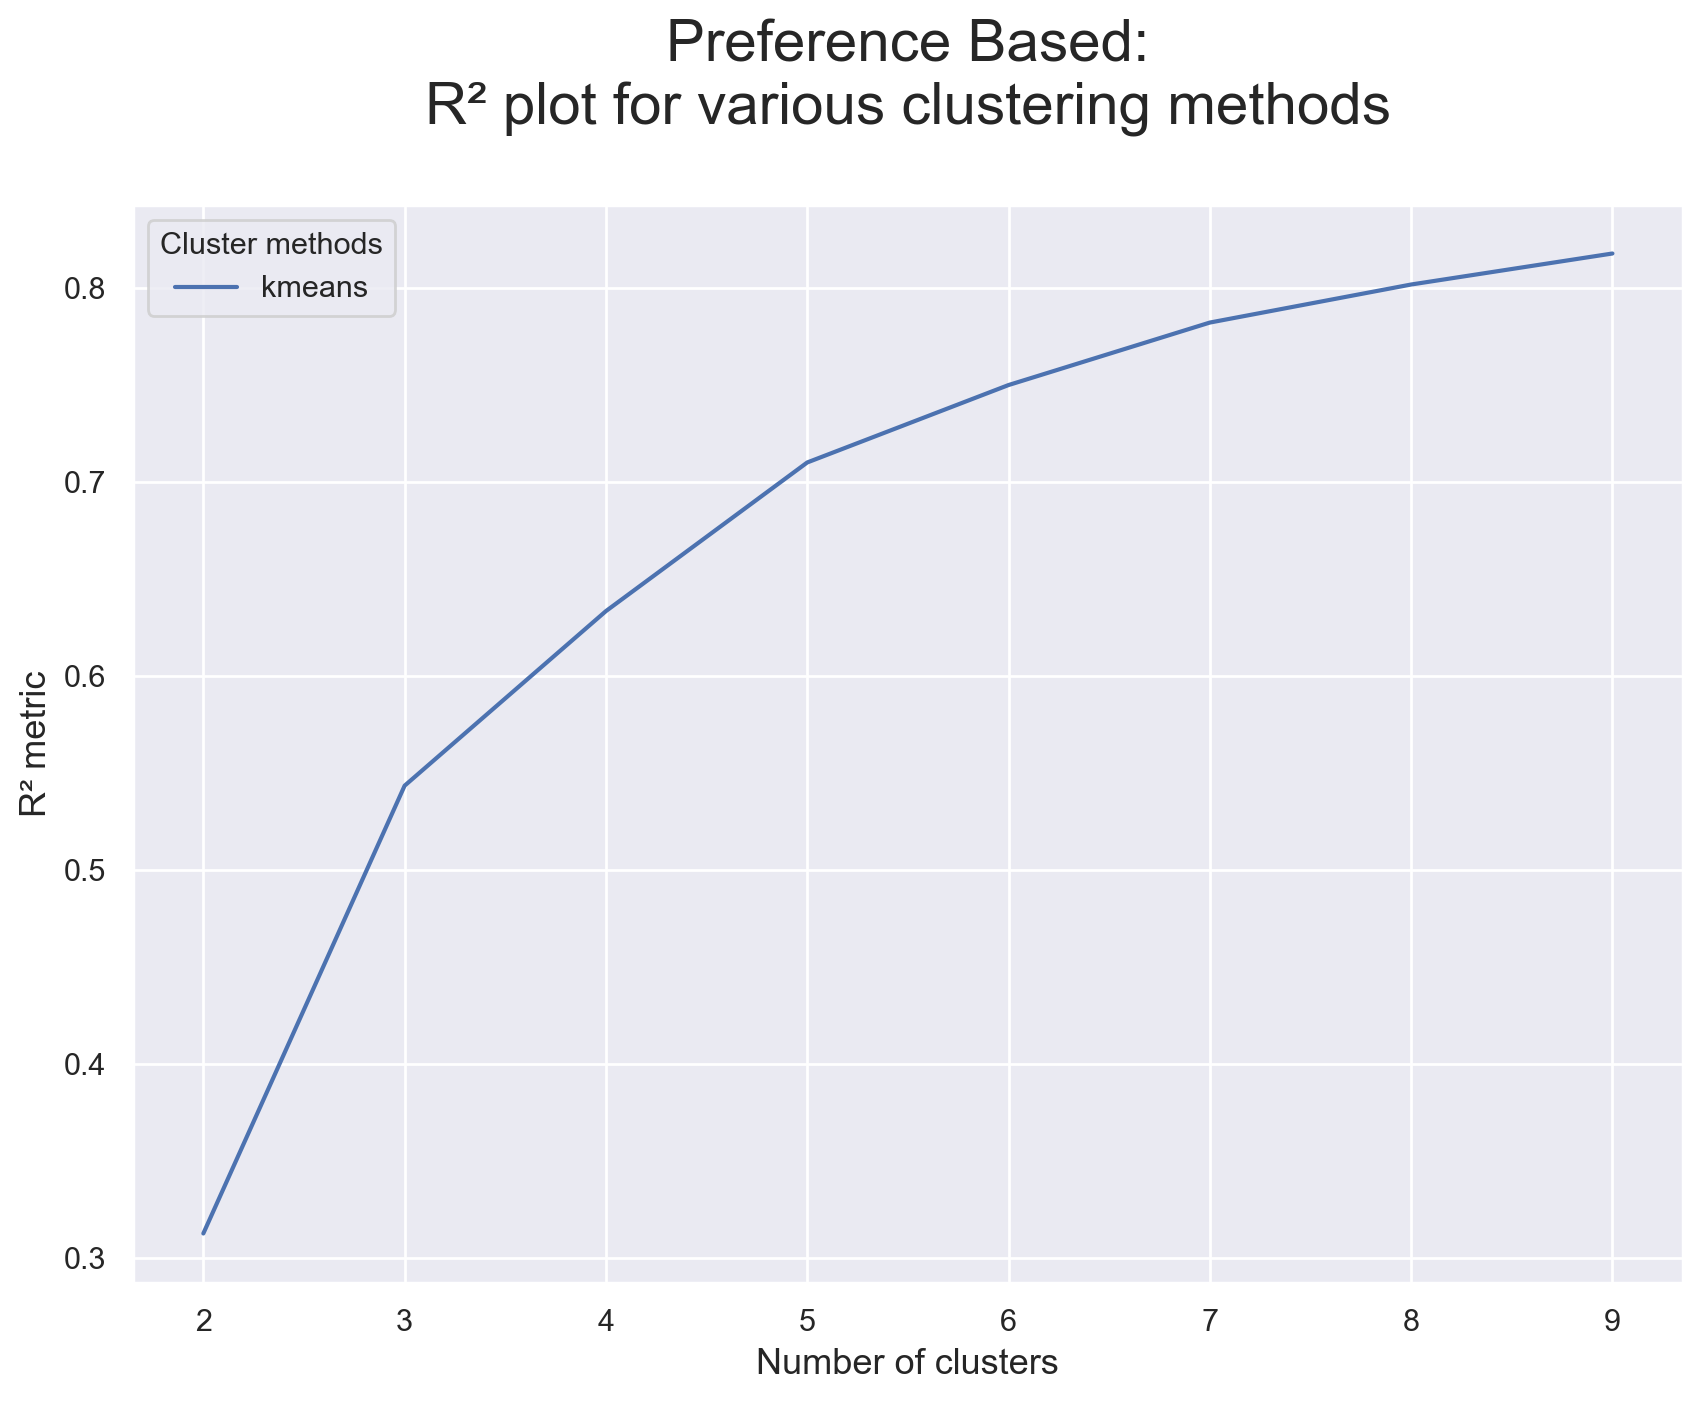

In [2111]:
# Visualizing the R² scores for each cluster solution on Behaviour based variables
r2_scores_df_beh.plot.line(figsize=(10,7))

plt.title("Preference Based:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

## Merging the Perspectives

In [2112]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_value = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=40,
    random_state=42
)
value_labels = kmeans_value.fit_predict(df_value)

kmeans_beh = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=40,
    random_state=42
)
behaviour_labels = kmeans_beh.fit_predict(df_beh)


df['value_labels'] = value_labels
df['behaviour_labels'] = behaviour_labels



In [2113]:
# Silhouette score for value-based clustering
silhouette_value = silhouette_score(df_value, value_labels)
print(f"Silhouette Score (Value Clustering): {silhouette_value:.2f}")

# Silhouette score for behavior-based clustering
silhouette_beh = silhouette_score(df_beh, behaviour_labels)
print(f"Silhouette Score (Behavior Clustering): {silhouette_beh:.2f}")


Silhouette Score (Value Clustering): 0.37
Silhouette Score (Behavior Clustering): 0.36


In [2114]:
print(f"Inertia (Value Clustering): {kmeans_value.inertia_:.2f}")
print(f"Inertia (Behavior Clustering): {kmeans_beh.inertia_:.2f}")


Inertia (Value Clustering): 43241.55
Inertia (Behavior Clustering): 65263.59


In [2115]:
# Run KMeans multiple times
centroid_diff = []
for _ in range(5):  # Perform 5 separate clustering runs
    km = KMeans(n_clusters=3, init='k-means++', n_init=40, random_state=None)
    km.fit(df_value)
    centroid_diff.append(np.linalg.norm(km.cluster_centers_ - kmeans_value.cluster_centers_))

# Check the average difference in centroids
print(f"Average Centroid Difference Across Runs: {np.mean(centroid_diff):.4f}")


Average Centroid Difference Across Runs: 4.9942


In [2116]:
# Count label frequencies (contigency table)

pd.crosstab(df['value_labels'],
            df['behaviour_labels'])

behaviour_labels    0     1     2 
value_labels                      
0                 5496    37  2492
1                 2759  6921  1670
2                 5870  1684  4042

### Manual merging: Merge lowest frequency clusters into closest clusters

In [2117]:
# Get centroids of clusters based on value, preference, and behavior labels
df_centroids = df.groupby(['value_labels', 'behaviour_labels'])[metric_features].mean()

df_centroids


first_order  Sum_of_Orders   recency  active_period  frequency  total_spend  cuisine_diversity  Weekdays  Weekends
value_labels behaviour_labels                                                                                                                    
0            0                  0.750968     -0.690750     0.717665   -1.187460     1.601974   -0.546570       -0.804199       0.918238 -0.912803
             1                 -0.727185     -0.124203     2.015205   -0.999663     0.572400   -0.247110        0.432149      -0.166574  0.182039
             2                  0.559083     -0.674688     0.908758   -1.181049     1.522052   -0.544711       -0.765923      -2.005229  2.037695
1            0                 -0.252454     -0.116605    -0.763911    0.813726    -0.689396    0.079796       -0.222322       0.652084 -0.644188
             1                 -0.755683      1.060434    -0.750610    1.217471    -0.551518    0.833213        1.143178       0.035708 -0.022112
             2                 -0.454008     -0.114181    -0.678634    0.912023    -0.697758    0.103436       -0.171113      -1.046234  1.069833
2            0                  0.300435     -0.322728     0.102624   -0.328736    -0.500301   -0.330323       -0.285153       0.695713 -0.688220
             1                 -0.619000      0.165867     0.474790    0.133032    -0.519093   -0.190139        0.721058      -0.015553  0.029622
             2                  0.173930     -0.388892     0.246302   -0.338544    -0.534116   -0.374045       -0.339868      -1.070271  0.985060

In [2131]:
# Clusters with low frequency to be merged:
# (Value_label, Behaviour_label)
to_merge = [(0,1),(1,2),(2,1)]

In [2132]:
# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists

value_labels                      0                             1                               2                          
behaviour_labels                  0         1         2         0         1         2           0           1         2    
value_labels behaviour_labels                                                                                              
0            0                 0.000000  3.046070  4.163363  3.696024  5.018163  4.695098  2.507945e+00  3.622954  3.705567
             1                 3.046070  0.000000  3.530516  3.836336  4.121655  3.827288  2.894226e+00  2.252960  2.783195
             2                 4.163363  3.530516  0.000000  5.251364  5.612212  3.974816  4.545303e+00  4.301607  2.792732
1            0                 3.696024  3.836336  5.251364  0.000000  2.240532  2.425483  1.617412e+00  2.025700  2.910164
             1                 5.018163  4.121655  5.612212  2.240532  0.000000  2.492684  3.228492e+00  2.174474  3.503502
             2                 4.695098  3.827288  3.974816  2.425483  2.492684  0.000000  3.021225e+00  2.258602  1.783314
2            0                 2.507945  2.894226  4.545303  1.617412  3.228492  3.021225  2.107342e-08  1.868016  2.442485
             1                 3.622954  2.252960  4.301607  2.025700  2.174474  2.258602  1.868016e+00  0.000000  2.096661
             2                 3.705567  2.783195  2.792732  2.910164  3.503502  1.783314  2.442485e+00  2.096661  0.000000

In [2133]:
# Merging each low frequency clustering (source) 
# to the closest cluster (target)

source_target = {}

for clus in to_merge:
    # If cluster to merge (source) has not yet been used as target
    if clus not in source_target.values():
        # Add this cluster to source_target map as key
        # Use the cluster with the smallest distance to it as value
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target


{(0, 1): (2, 1), (1, 2): (2, 2)}

In [2134]:
df_ = df.copy()

# Changing the Value_labels and Behaviour_labels based on source_target
for source, target in source_target.items():
    mask = (df_['value_labels']==source[0]) & (df_['behaviour_labels']==source[1])
    df_.loc[mask, 'value_labels'] = target[0]
    df_.loc[mask, 'behaviour_labels'] = target[1]

In [2135]:
# New contigency table

pd.crosstab(df_['value_labels'],
            df_['behaviour_labels'])

behaviour_labels    0     1     2 
value_labels                      
0                 5496     0  2492
1                 2759  6921     0
2                 5870  1721  5712

### Merging using Hierarchical clustering

Doesnt care about how large our clustering is; just how far from the others are

In [2136]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['value_labels', 'behaviour_labels'])\
    [metric_features].mean()
df_centroids

first_order  Sum_of_Orders   recency  active_period  frequency  total_spend  cuisine_diversity  Weekdays  Weekends
value_labels behaviour_labels                                                                                                                    
0            0                  0.750968     -0.690750     0.717665   -1.187460     1.601974   -0.546570       -0.804199       0.918238 -0.912803
             1                 -0.727185     -0.124203     2.015205   -0.999663     0.572400   -0.247110        0.432149      -0.166574  0.182039
             2                  0.559083     -0.674688     0.908758   -1.181049     1.522052   -0.544711       -0.765923      -2.005229  2.037695
1            0                 -0.252454     -0.116605    -0.763911    0.813726    -0.689396    0.079796       -0.222322       0.652084 -0.644188
             1                 -0.755683      1.060434    -0.750610    1.217471    -0.551518    0.833213        1.143178       0.035708 -0.022112
             2                 -0.454008     -0.114181    -0.678634    0.912023    -0.697758    0.103436       -0.171113      -1.046234  1.069833
2            0                  0.300435     -0.322728     0.102624   -0.328736    -0.500301   -0.330323       -0.285153       0.695713 -0.688220
             1                 -0.619000      0.165867     0.474790    0.133032    -0.519093   -0.190139        0.721058      -0.015553  0.029622
             2                  0.173930     -0.388892     0.246302   -0.338544    -0.534116   -0.374045       -0.339868      -1.070271  0.985060

In [2137]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids)

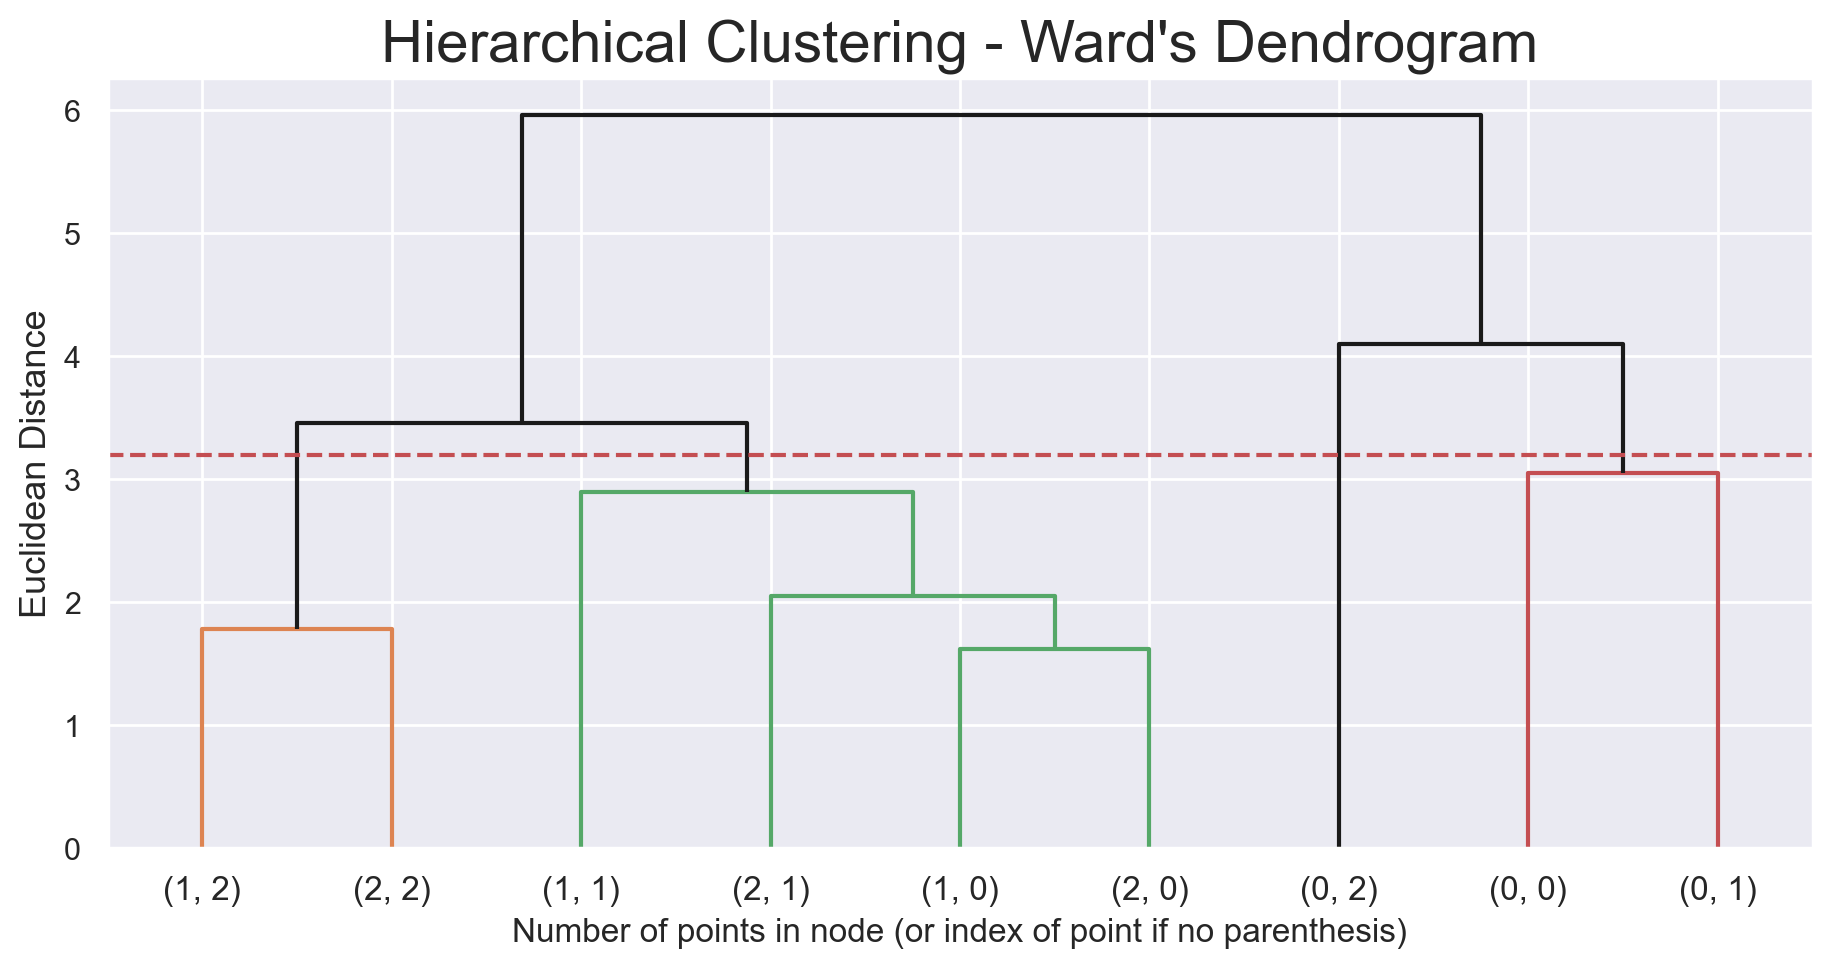

In [2138]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 3.2

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [2139]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

first_order  Sum_of_Orders   recency  active_period  frequency  total_spend  cuisine_diversity  Weekdays  Weekends  hclust_labels
value_labels behaviour_labels                                                                                                                                   
0            0                  0.750968     -0.690750     0.717665   -1.187460     1.601974   -0.546570       -0.804199       0.918238 -0.912803        0      
             1                 -0.727185     -0.124203     2.015205   -0.999663     0.572400   -0.247110        0.432149      -0.166574  0.182039        0      
             2                  0.559083     -0.674688     0.908758   -1.181049     1.522052   -0.544711       -0.765923      -2.005229  2.037695        2      
1            0                 -0.252454     -0.116605    -0.763911    0.813726    -0.689396    0.079796       -0.222322       0.652084 -0.644188        1      
             1                 -0.755683      1.060434    -0.750610    1.217471    -0.551518    0.833213        1.143178       0.035708 -0.022112        1      
             2                 -0.454008     -0.114181    -0.678634    0.912023    -0.697758    0.103436       -0.171113      -1.046234  1.069833        3      
2            0                  0.300435     -0.322728     0.102624   -0.328736    -0.500301   -0.330323       -0.285153       0.695713 -0.688220        1      
             1                 -0.619000      0.165867     0.474790    0.133032    -0.519093   -0.190139        0.721058      -0.015553  0.029622        1      
             2                  0.173930     -0.388892     0.246302   -0.338544    -0.534116   -0.374045       -0.339868      -1.070271  0.985060        3

In [2140]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 2,
 (1, 0): 1,
 (1, 1): 1,
 (1, 2): 3,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 3}

In [2142]:
df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['value_labels'], row['behaviour_labels'])
    ], axis=1
)

df_.head()

customer_age  vendor_count  product_count  is_chain  first_order  last_order last_promo payment_method  Sum_of_Orders  early_morning(0h-5h)  morning(6h-11h)  afternoon(12h-17h)  night(18h-23h)       age_group         recency  active_period  frequency  total_spend  cuisine_diversity  customer_city  Weekdays  Weekends  Main Courses  Snacks and Street Food  Desserts and Beverages  Healthy and Special Diets    Other   enc_payment_method_CARD  enc_payment_method_CASH  enc_payment_method_DIGI  enc_is_chain_0  enc_is_chain_1  enc_customer_city_2  enc_customer_city_4  enc_customer_city_8  enc_age_group  enc_last_promo  value_labels  behaviour_labels  merged_labels
customer_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1b8f824d5e    -1.338050     -0.399572     -0.069431         1     -1.183266    -2.691007   DELIVERY       DIGI        -0.498308          -0.455621          -0.792308          -1.063637          2.646362        Teenagers (15-19)  2.691007   -1.160188     1.557000   -0.194602       -0.860516             2       -2.236180  2.270781    0.144187          -0.340593               -0.328655                -0.173833          -0.327942            0.0                      0.0                      1.0                  0.0             1.0               1.0                  0.0                  0.0               0.0             1.0             0               2               2      
5d272b9dcb    -1.479296     -0.399572     -0.583074         1     -1.183266    -2.691007   DISCOUNT       DIGI        -0.498308          -0.455621           2.138564          -1.063637         -0.628169        Teenagers (15-19)  2.691007   -1.160188     1.557000   -0.442515       -0.177250             8       -2.236180  2.270781   -0.180168          -0.340593               -0.328655                -0.173833          -0.327942            0.0                      0.0                      1.0                  0.0             1.0               0.0                  0.0                  1.0               0.0             1.0             0               2               2      
f6d1b2ba63     1.486865     -0.780775     -0.583074         1     -1.183266    -2.691007   DISCOUNT       CASH        -0.498308          -0.455621           2.138564          -1.063637         -0.628169           Adults (30-49)  2.691007   -1.160188     1.557000   -0.699144       -0.860516             4       -2.236180  2.270781   -0.515927          -0.340593               -0.328655                -0.173833          -0.327942            0.0                      1.0                      0.0                  0.0             1.0               0.0                  1.0                  0.0               2.0             1.0             0               2               2      
180c632ed8    -0.208084     -0.399572     -0.411860         1     -1.183266    -2.647970   DELIVERY       DIGI        -0.498308          -0.455621           0.673128           0.244260         -0.628169     Young Adults (20-29)  2.647970   -1.126053     0.754685   -0.125894       -0.177250             4       -0.654043  0.674016    0.234080          -0.340593               -0.328655                -0.173833          -0.327942            0.0                      0.0                      1.0                  0.0             1.0               0.0                  1.0                  0.0               1.0             1

In [2143]:
# Merged cluster centroids
df_.groupby('merged_labels').mean(numeric_only=True)[metric_features]

first_order  Sum_of_Orders   recency  active_period  frequency  total_spend  cuisine_diversity  Weekdays  Weekends
merged_labels                                                                                                                    
0               0.741083     -0.686961     0.726342   -1.186204     1.595089   -0.544568       -0.795931       0.910984 -0.905481
1              -0.302045      0.313477    -0.342384    0.520224    -0.552978    0.216295        0.396830       0.354176 -0.343526
2               0.559083     -0.674688     0.908758   -1.181049     1.522052   -0.544711       -0.765923      -2.005229  2.037695
3              -0.009658     -0.308576    -0.024119    0.027081    -0.581960   -0.234445       -0.290530      -1.063243  1.009845

In [2144]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts

0  
merged_labels       
0               5533
1              17234
2               2492
3               5712

In [2145]:
# Getting the Value and Preference labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts

merged_labels    0  
0     (0, 1)      5533
1     (2, 1)     17234
2     (0, 2)      2492
3     (2, 2)      5712

In [2146]:
df_counts['value_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['preference_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])


df_counts


merged_labels    0    value_labels  preference_labels
0     (0, 1)      5533        0               1        
1     (2, 1)     17234        2               1        
2     (0, 2)      2492        0               2        
3     (2, 2)      5712        2               2

In [2147]:
df_counts.pivot(values=0, index='value_labels', columns='preference_labels')

pivot_table


preference_labels           0     1     2  
value_labels time_labels                   
1            1               0     0  15846
2            0               0     0   2901
             1               0  8052      0
             2            4181     0     18

In [2148]:
df = df_.copy()

In [2149]:
from sklearn.metrics import silhouette_score
silhouette_score(df[metric_features], df['merged_labels'])


0.23739889201614217

In [2150]:
# Step 1: Calculate total variance
total_variance = np.var(df[metric_features], axis=0).sum()

# Step 2: Calculate within-cluster variance
within_cluster_variance = 0
for cluster in df['merged_labels'].unique():
    cluster_data = df[df['merged_labels'] == cluster][metric_features]
    within_cluster_variance += np.var(cluster_data, axis=0).sum()

# Step 3: Calculate R^2
r_squared = (total_variance - within_cluster_variance) / total_variance

print(f"R^2 for clustering: {r_squared:.4f}")


R^2 for clustering: -0.8750


# Cluster Analysis

In [2151]:
def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compare_titles == None:
        compare_titles = [""]*len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, 
                                            label, 
                                            color = sns.color_palette(cmap),
                                            ax=ax[0])



        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False
                    )

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                              rotation=40,
                              ha='right'
                              )
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=label
                     ) # Adaptable to number of clusters
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
        
    
    # plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()

C:\Users\anama\AppData\Local\Temp\ipykernel_3028\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\anama\AppData\Local\Temp\ipykernel_3028\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\anama\AppData\Local\Temp\ipykernel_3028\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=label,


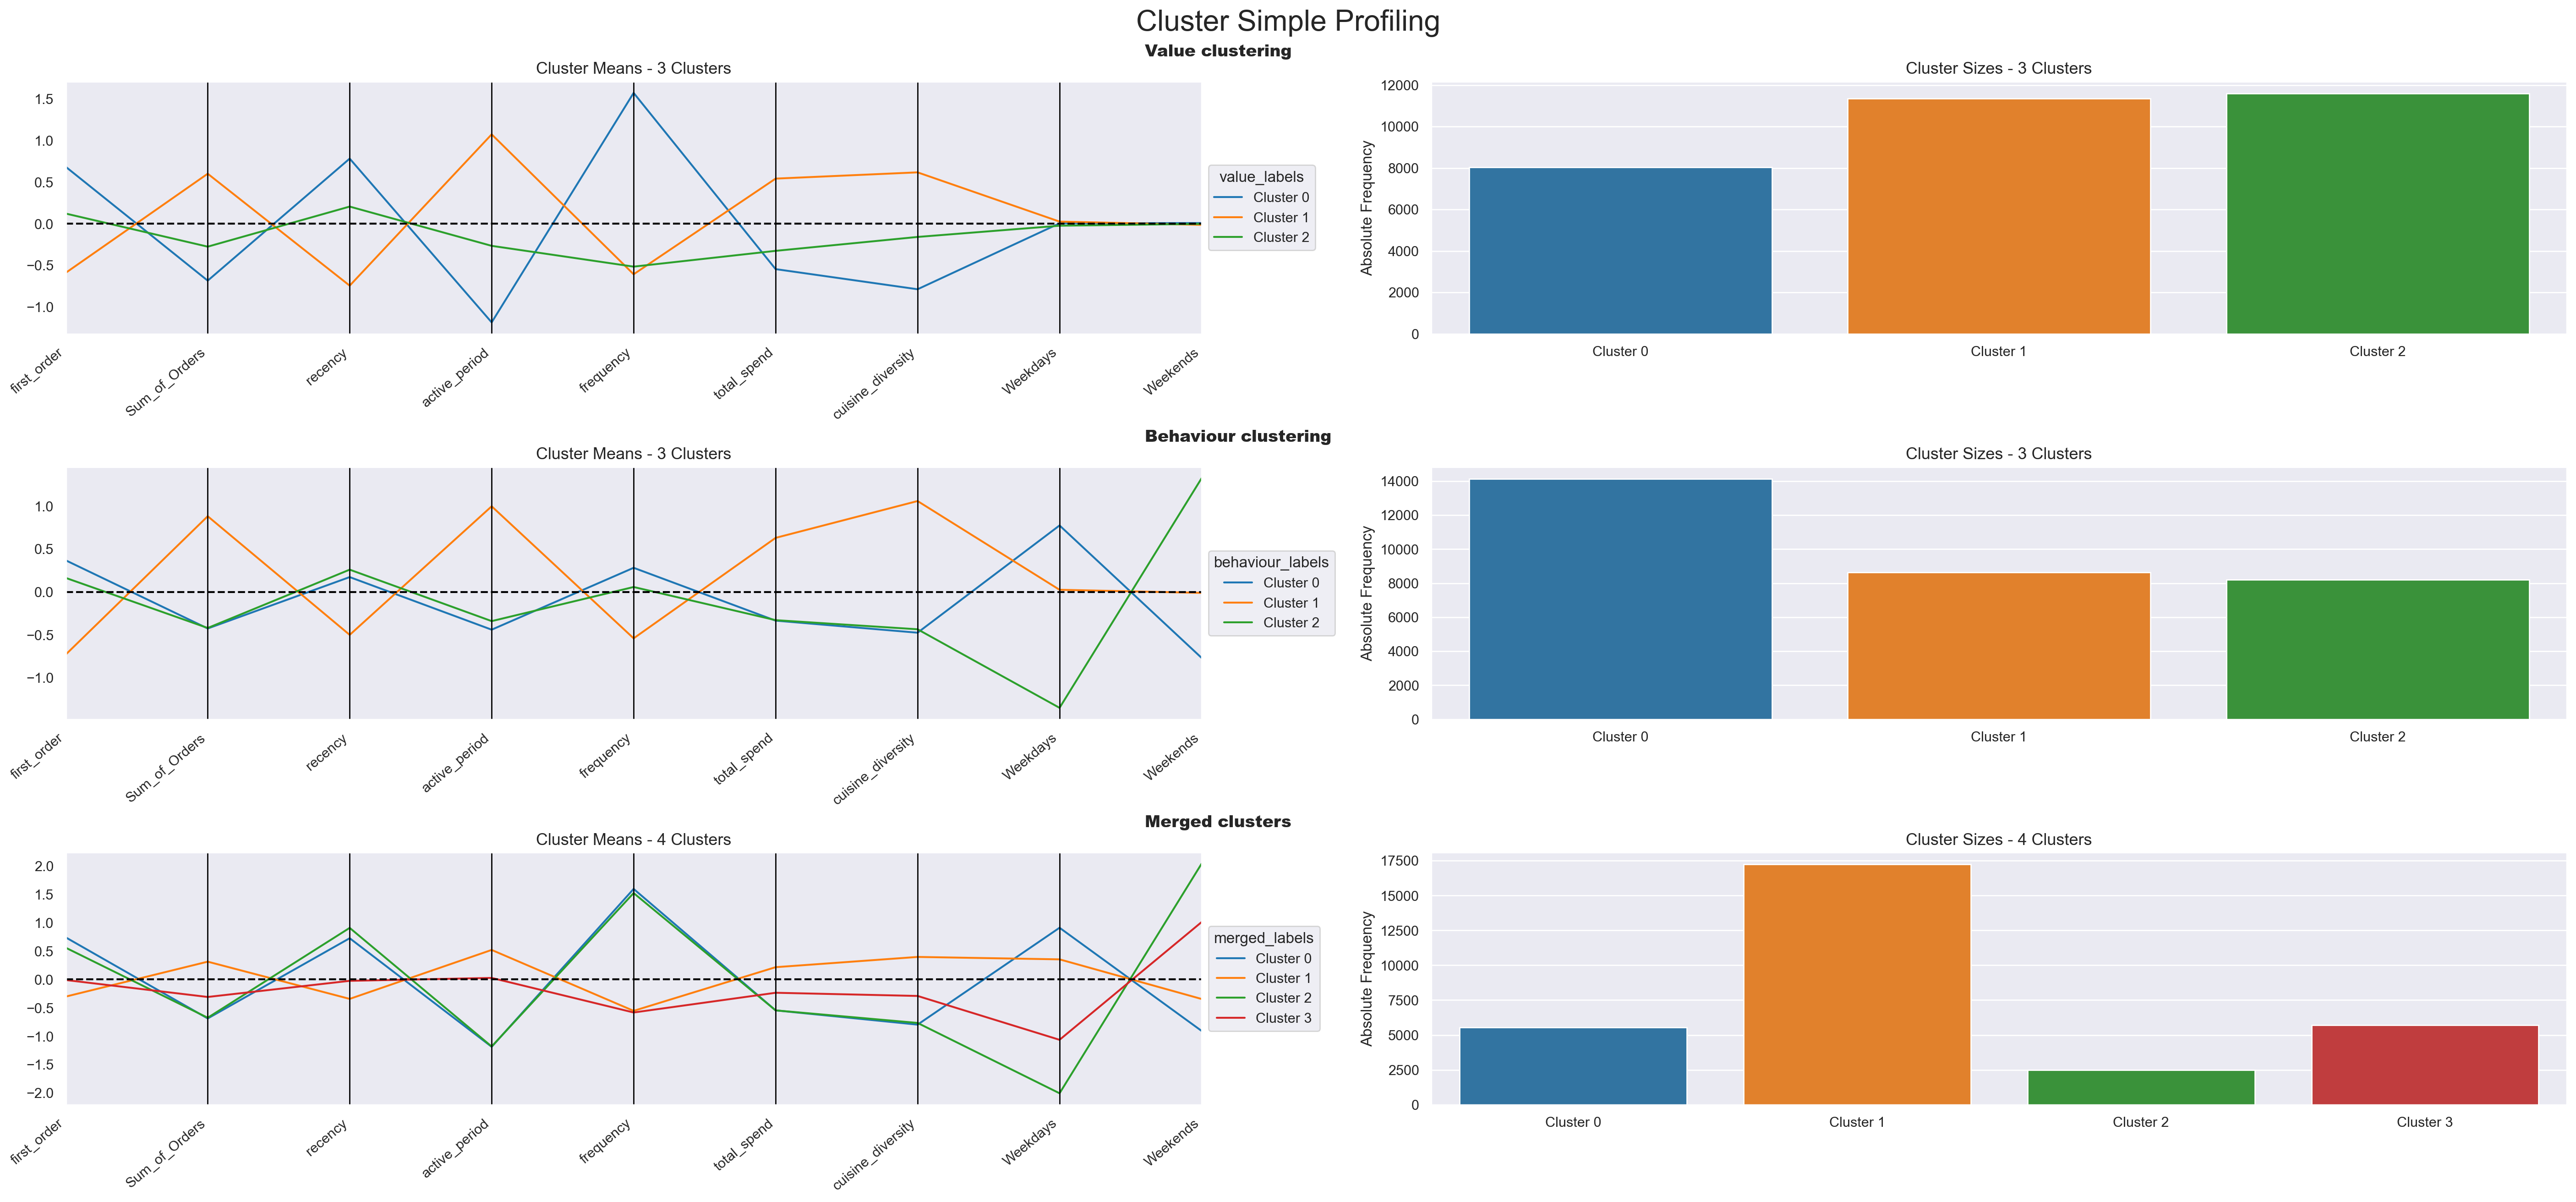

In [2152]:
# Profilling each cluster 
cluster_profiles(
    df = df[metric_features + ['value_labels', 'behaviour_labels', 'merged_labels']], 
    label_columns = ['value_labels', 'behaviour_labels','merged_labels'], 
    figsize = (28, 13), 
    compare_titles = ["Value clustering", "Behaviour clustering", "Merged clusters"]
)

## Profiling with unused / categorical features

## City

In [2153]:
df_city = df[['merged_labels',
            'enc_customer_city_2',
            'enc_customer_city_4',
            'enc_customer_city_8']].groupby(['merged_labels']).sum()

df_city

enc_customer_city_2  enc_customer_city_4  enc_customer_city_8
merged_labels                                                               
0                    1658.0               1851.0               2024.0       
1                    6335.0               5740.0               5159.0       
2                     743.0                786.0                963.0       
3                    1737.0               1765.0               2210.0

In [2154]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     5533
1    17234
2     2492
3     5712
Name: count, dtype: int64

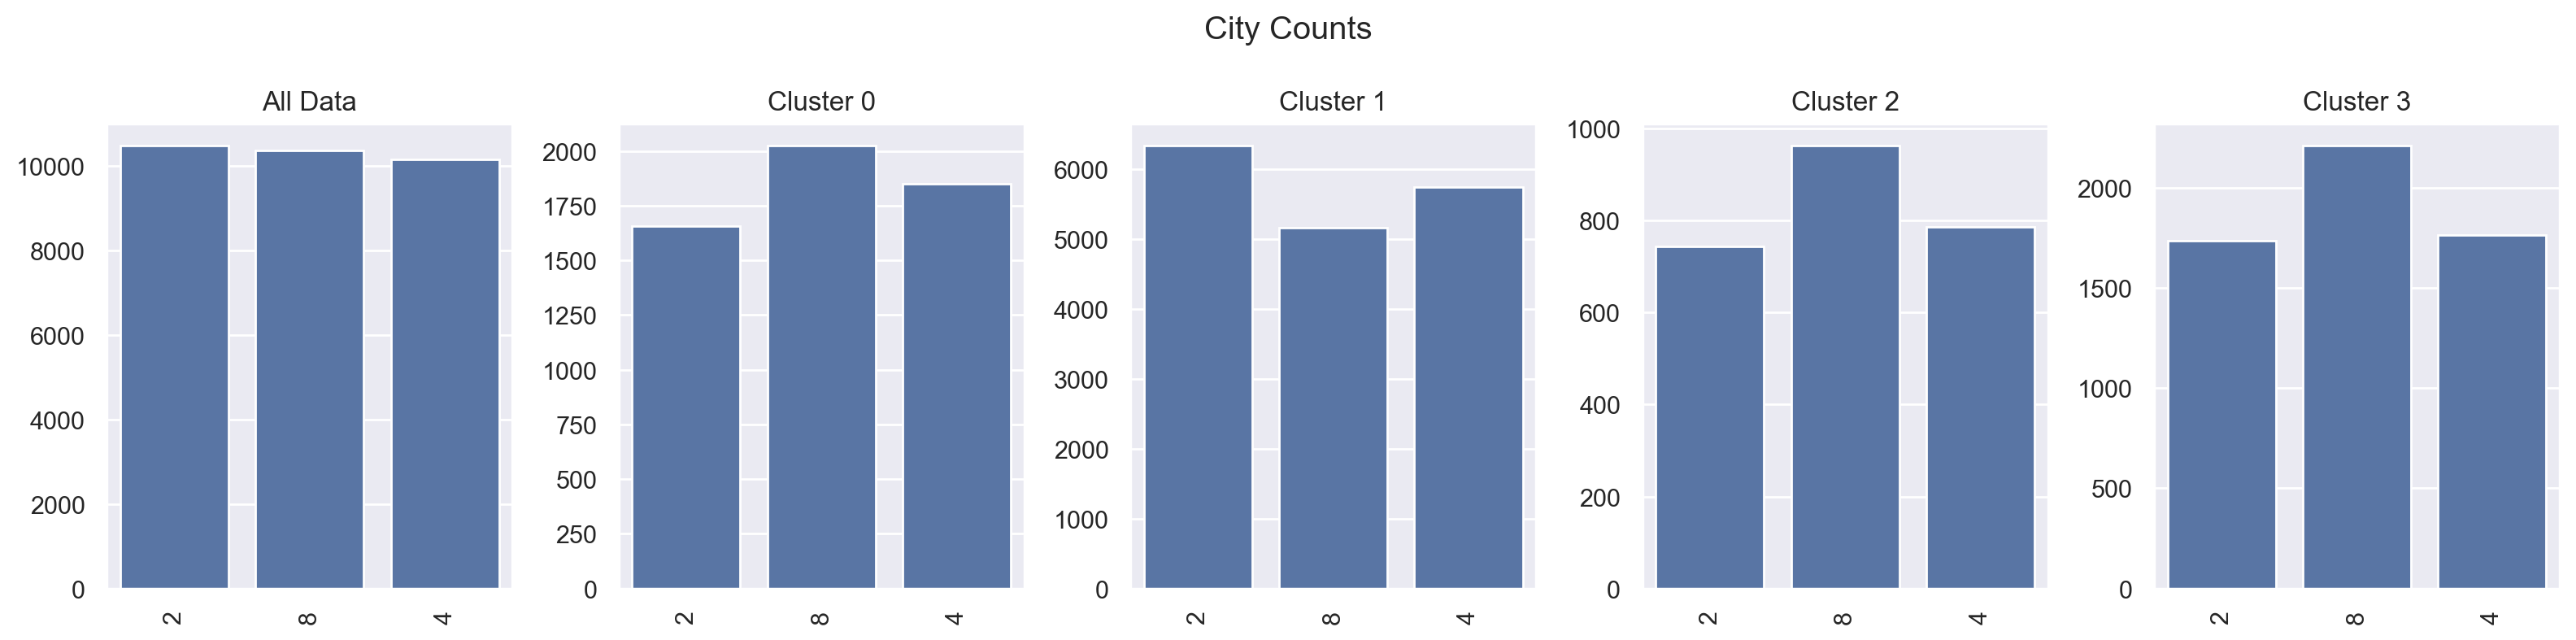

In [2155]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='customer_city', 
                        order = df['customer_city'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['merged_labels']==i-1], 
                    x='customer_city', 
                    order = df['customer_city'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("City Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

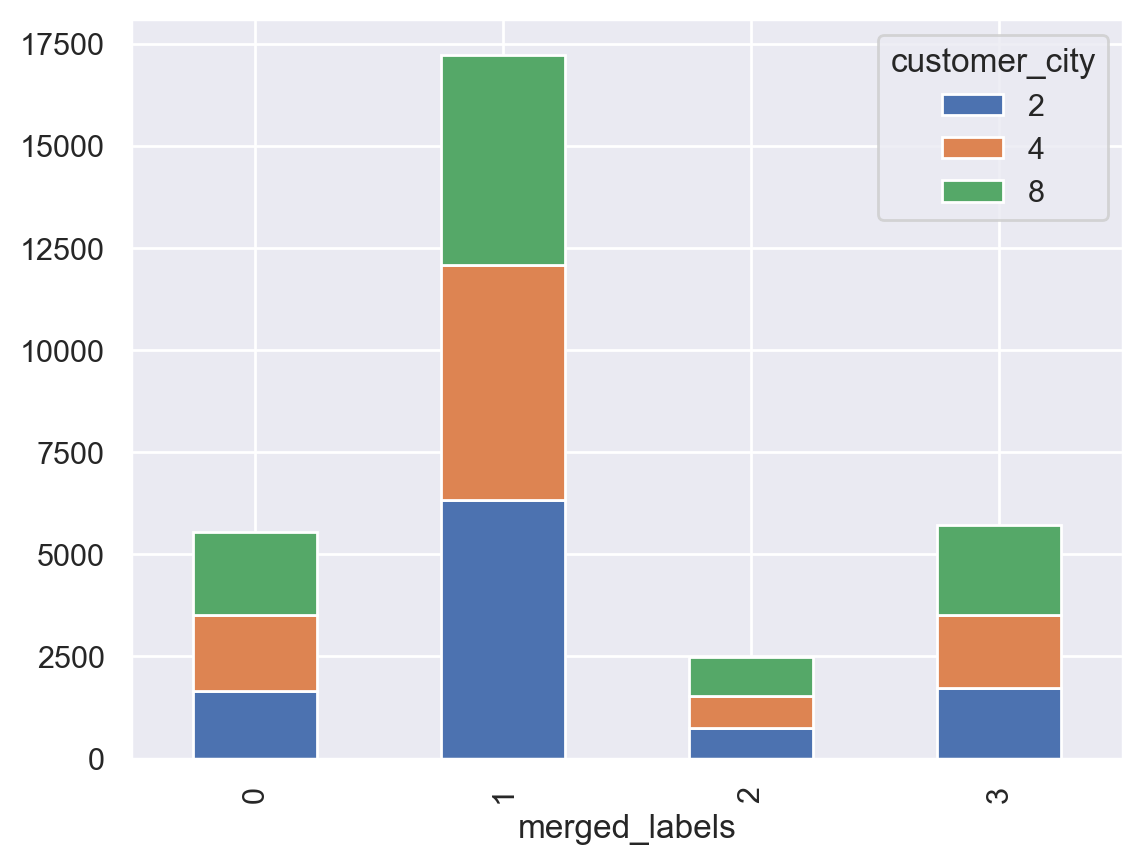

In [2156]:
df_cl_city = df.groupby([
    "merged_labels", 
    "customer_city",
    ])['customer_city'].size().unstack()

df_cl_city


df_cl_city.plot.bar(stacked=True)

<Axes: xlabel='merged_labels'>

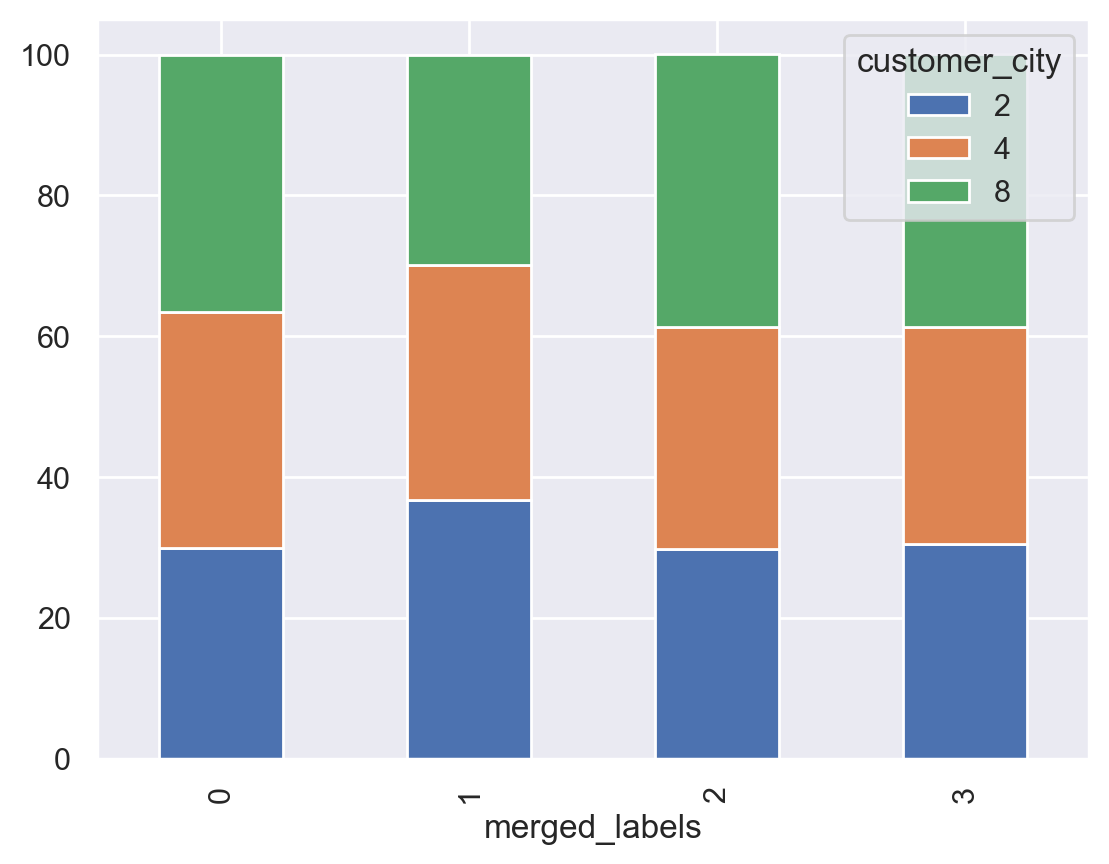

In [2157]:
df_cl_city_pct = df_cl_city.copy()
for i in df['customer_city'].unique():
    df_cl_city_pct[i] = 100*df_cl_city_pct[i]/df['merged_labels'].value_counts().sort_index().values

df_cl_city_pct.plot.bar(stacked=True)

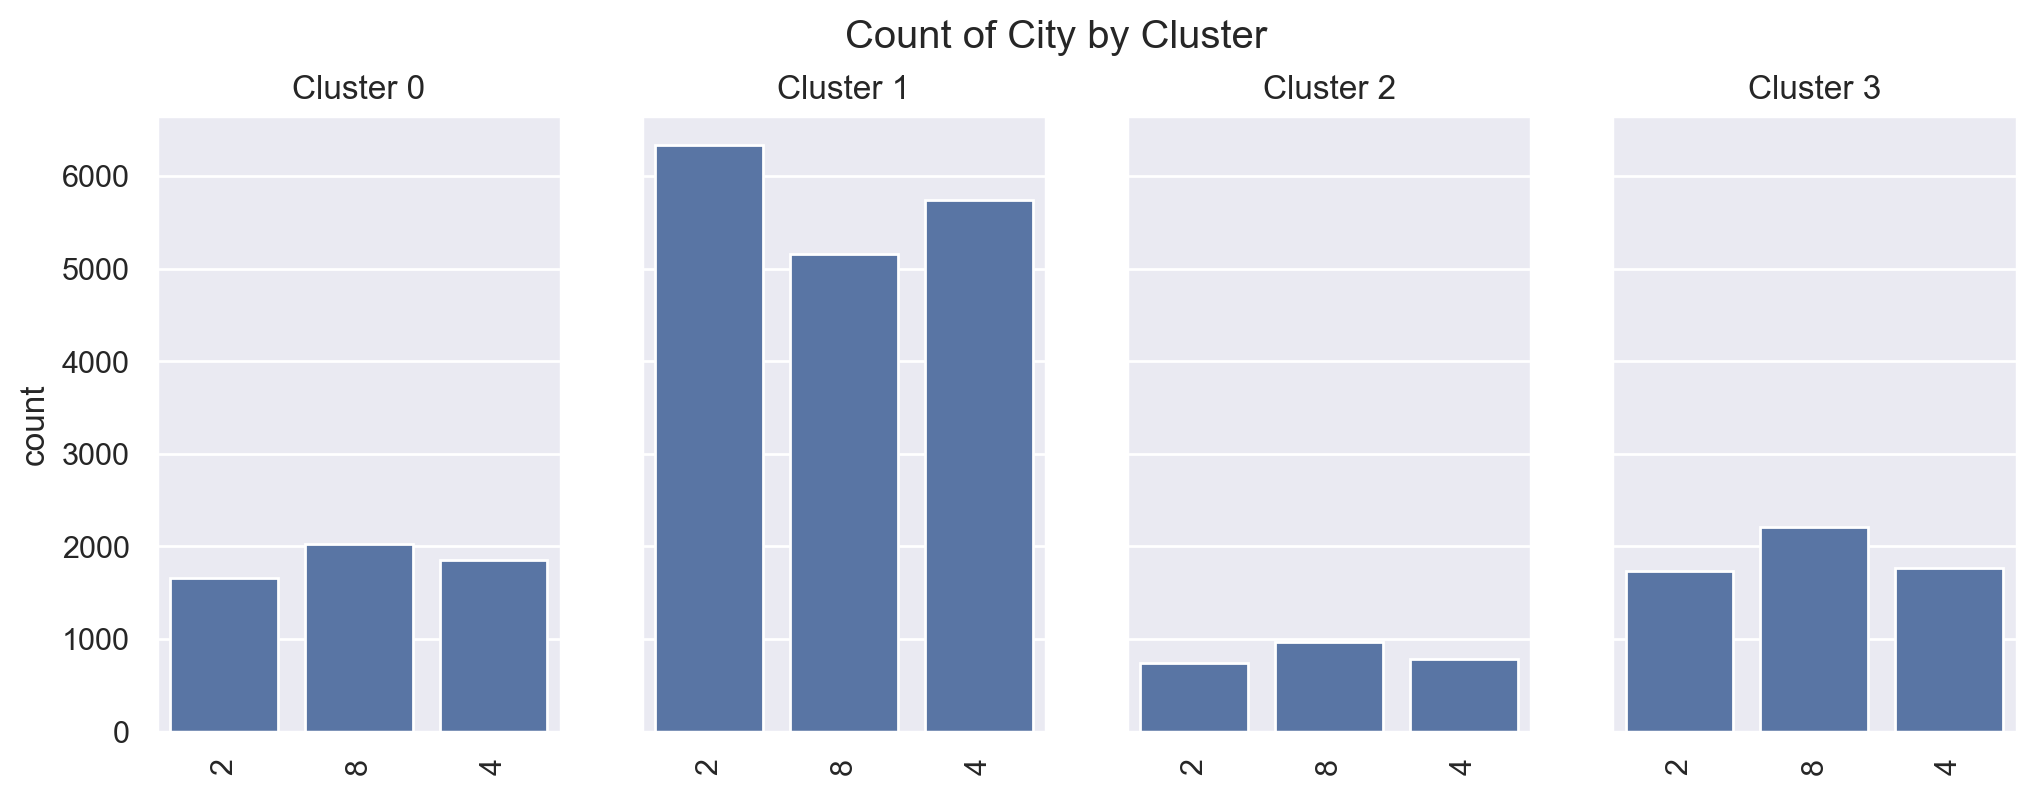

In [2158]:
fig, axes = plt.subplots(1, df['merged_labels'].nunique(), 
                         figsize=(12,4),
                         sharey=True,)

for ax, clust in zip(axes.flatten(), range(df['merged_labels'].nunique())): 
    df_cl = df.loc[df['merged_labels']==clust]
    sns.countplot(df_cl, 
                  x='customer_city', 
                  order = df['customer_city'].value_counts().index,
                  ax=ax)
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")

    ax.set_title("Cluster {}".format(clust))
plt.suptitle("Count of City by Cluster", y=1)
plt.show()

In [2159]:
pd.crosstab(df["merged_labels"],df["customer_city"])

customer_city    2     4     8 
merged_labels                  
0              1658  1851  2024
1              6335  5740  5159
2               743   786   963
3              1737  1765  2210

## Promo

In [2160]:
df_promo = df[['merged_labels',
            'enc_last_promo',
            ]].groupby(['merged_labels']).sum()

df_promo

enc_last_promo
merged_labels                
0                  3700.0    
1                  7024.0    
2                  1634.0    
3                  2449.0

In [2161]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     5533
1    17234
2     2492
3     5712
Name: count, dtype: int64

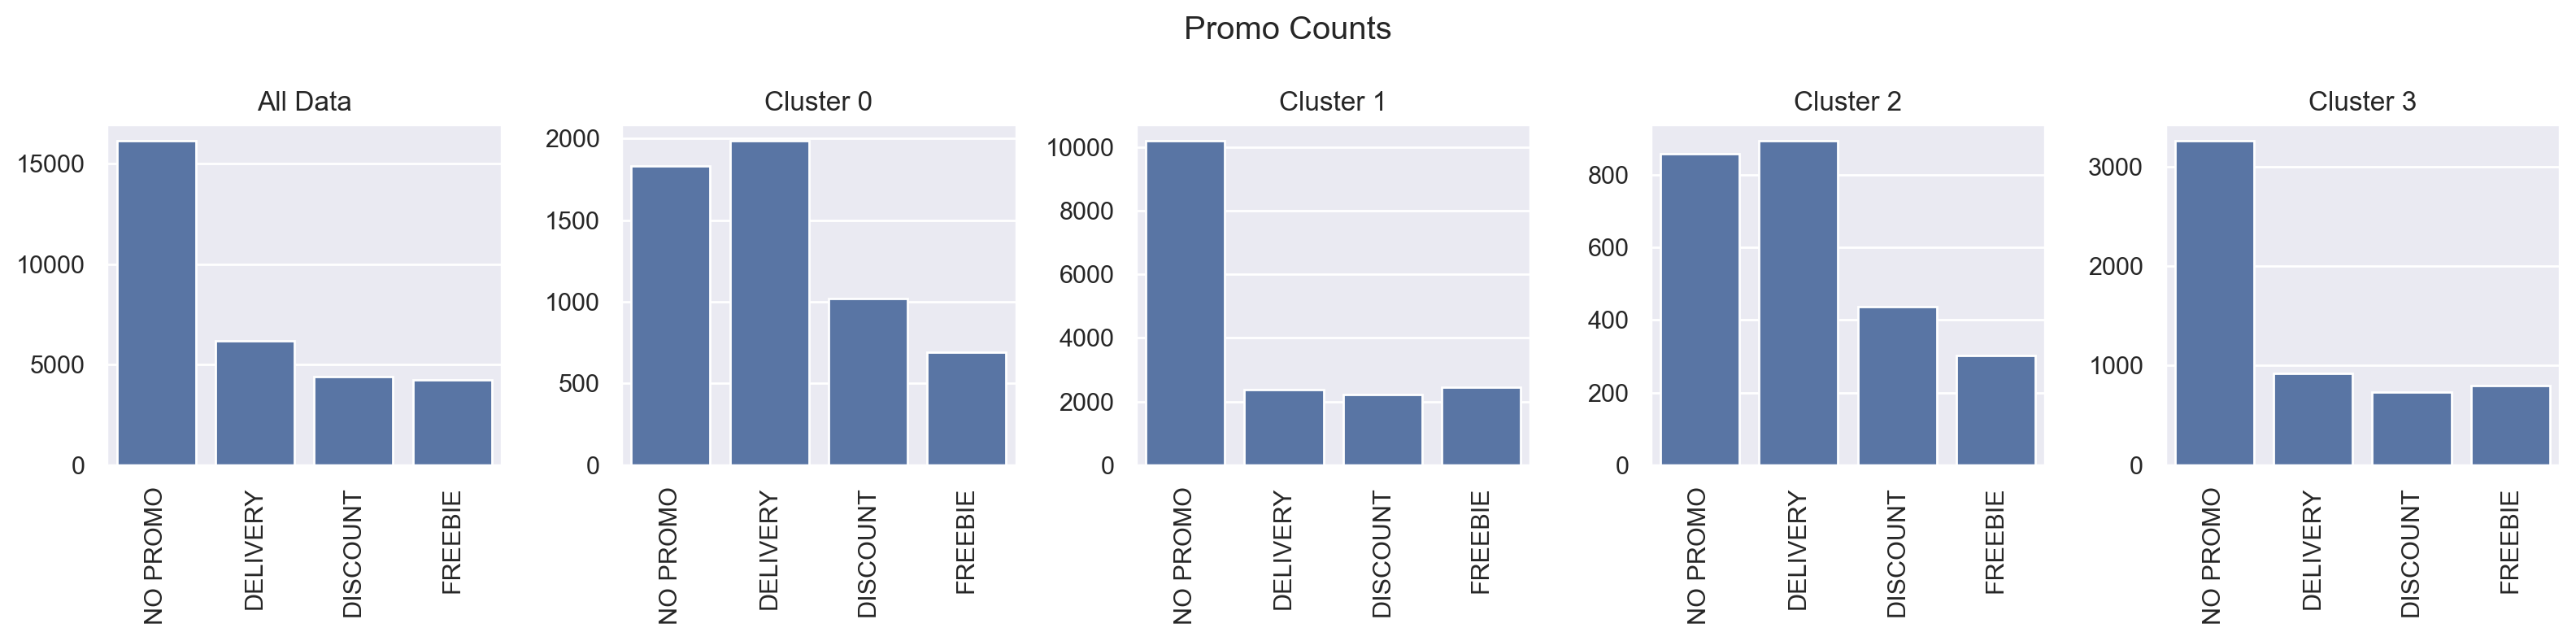

In [2162]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='last_promo', 
                        order = df['last_promo'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['merged_labels']==i-1], 
                    x='last_promo', 
                    order = df['last_promo'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Promo Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

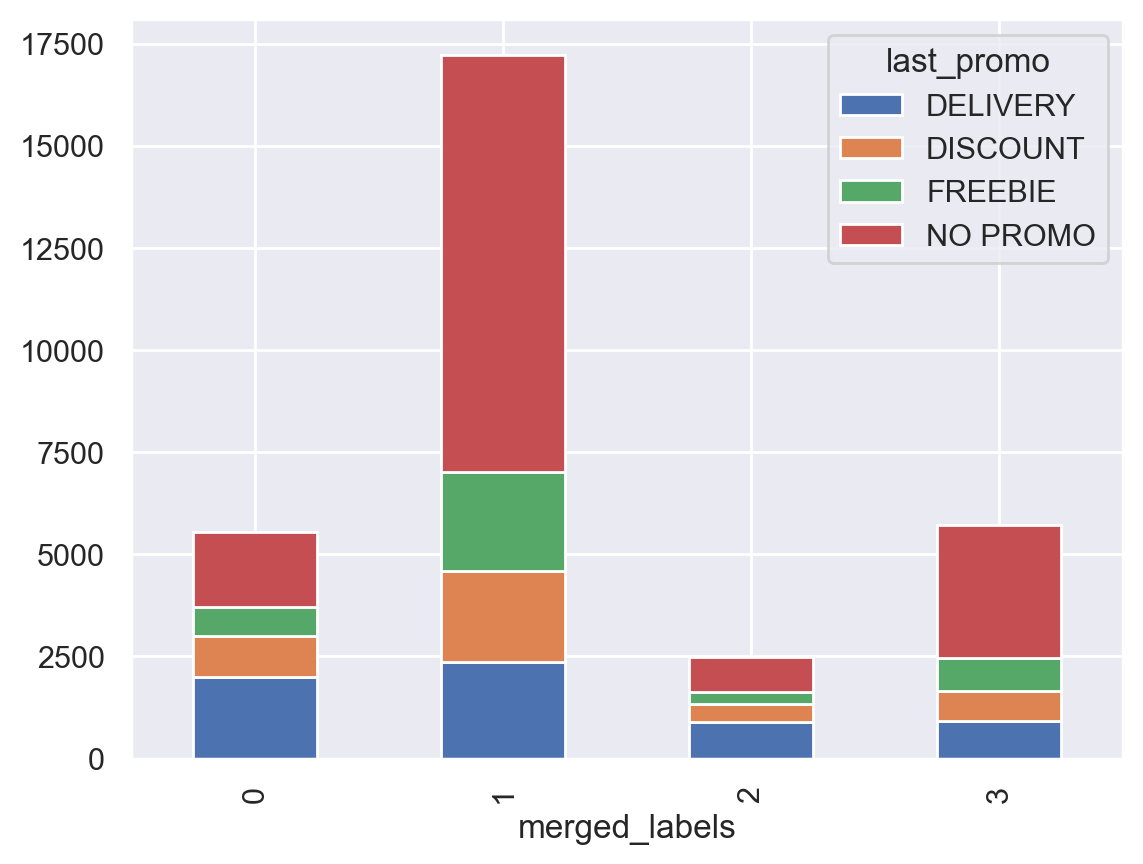

In [2163]:
df_cl_promo = df.groupby([
    "merged_labels", 
    "last_promo",
    ])['last_promo'].size().unstack()

df_cl_promo


df_cl_promo.plot.bar(stacked=True)

<Axes: xlabel='merged_labels'>

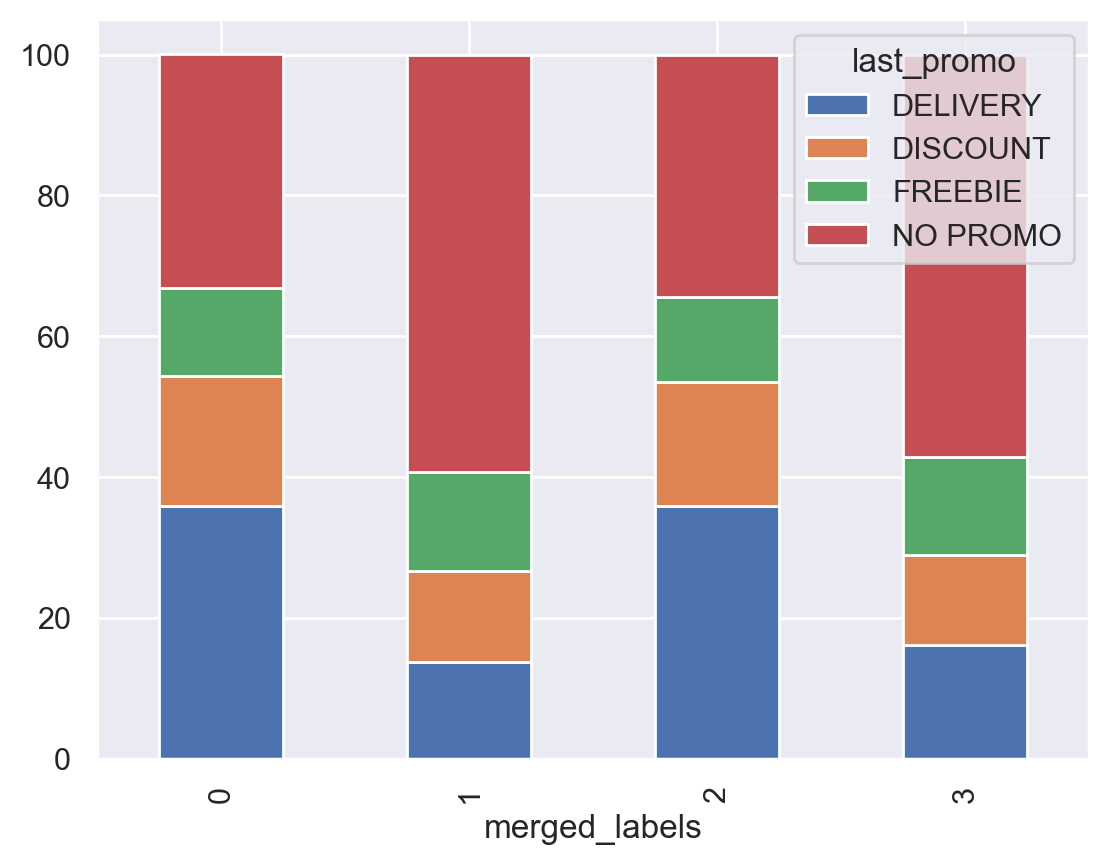

In [2164]:
df_cl_promo_pct = df_cl_promo.copy()
for i in df['last_promo'].unique():
    df_cl_promo_pct[i] = 100*df_cl_promo_pct[i]/df['merged_labels'].value_counts().sort_index().values

df_cl_promo_pct.plot.bar(stacked=True)

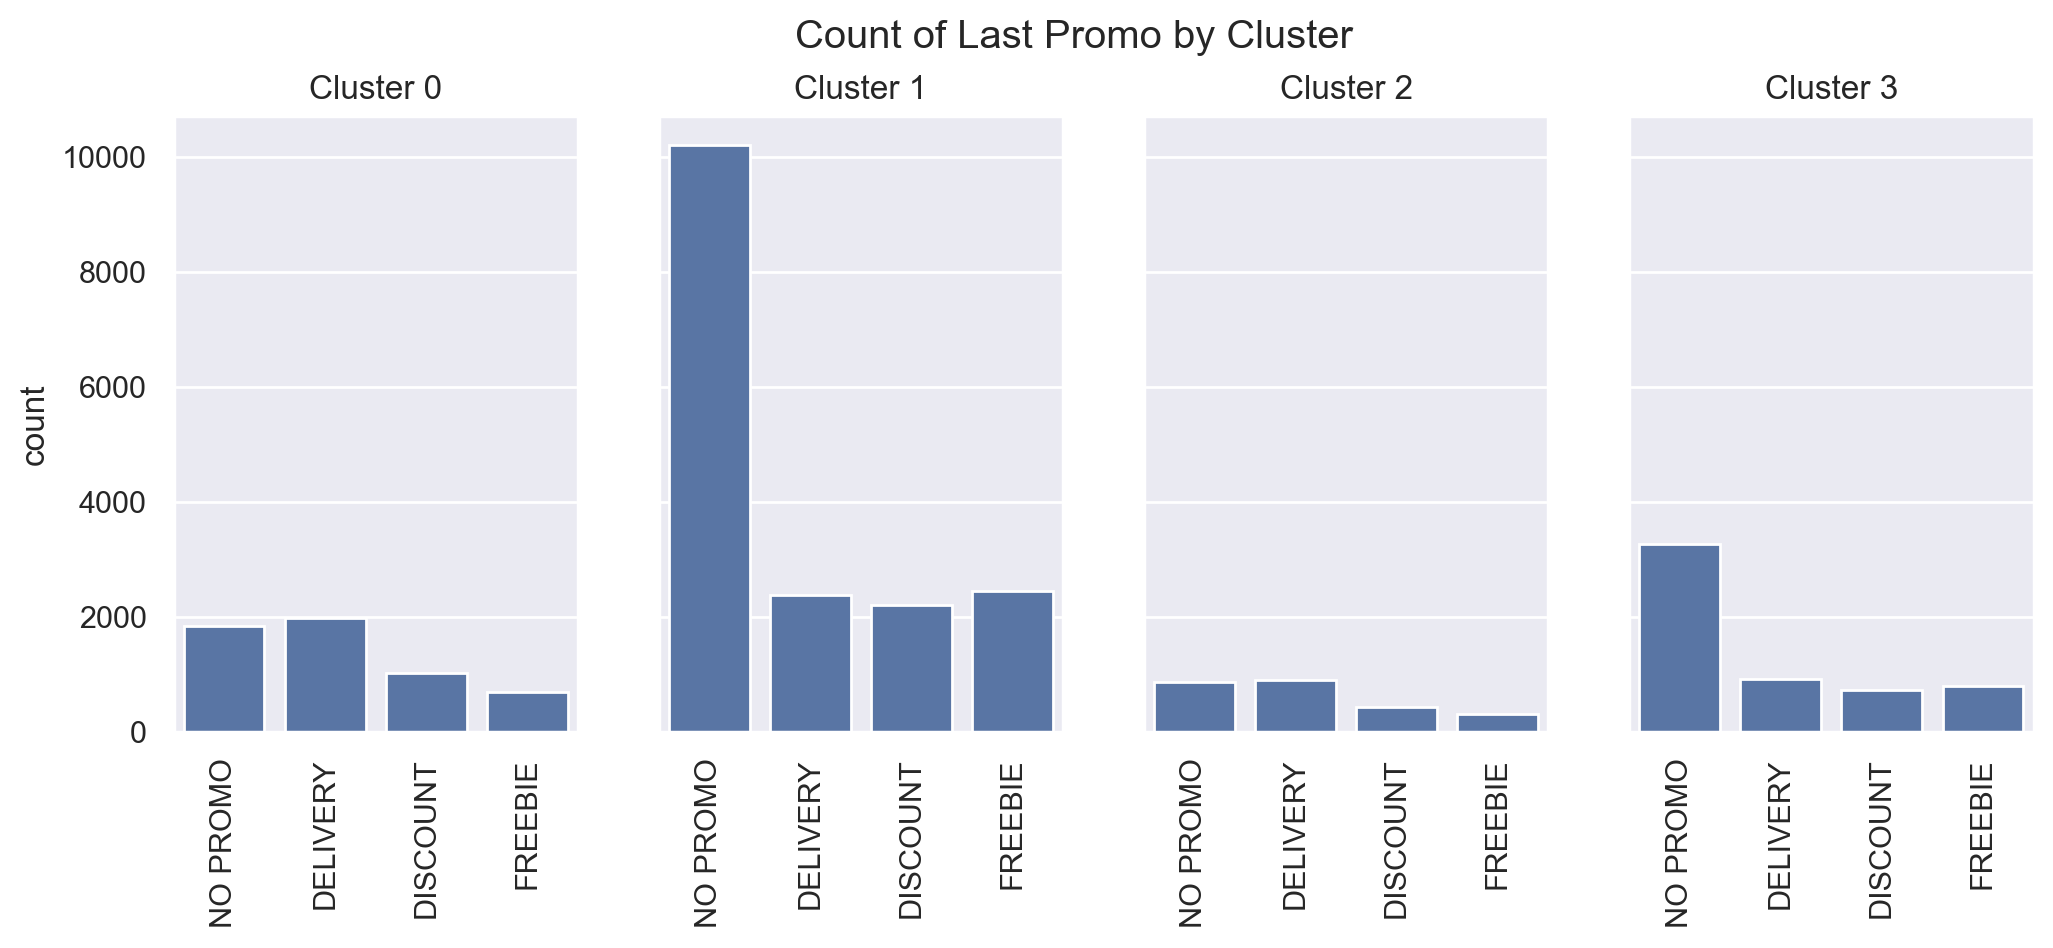

In [2165]:
fig, axes = plt.subplots(1, df['merged_labels'].nunique(), 
                         figsize=(12,4),
                         sharey=True,)

for ax, clust in zip(axes.flatten(), range(df['merged_labels'].nunique())): 
    df_cl = df.loc[df['merged_labels']==clust]
    sns.countplot(df_cl, 
                  x='last_promo', 
                  order = df['last_promo'].value_counts().index,
                  ax=ax)
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")

    ax.set_title("Cluster {}".format(clust))
plt.suptitle("Count of Last Promo by Cluster", y=1)
plt.show()

## Chain

In [2166]:
df_enc = df[['merged_labels',
            'enc_is_chain_0',
            'enc_is_chain_1',
]].groupby(['merged_labels']).sum()

df_enc

enc_is_chain_0  enc_is_chain_1
merged_labels                                
0                  2092.0           3441.0   
1                  1945.0          15289.0   
2                   883.0           1609.0   
3                  1116.0           4596.0

In [2167]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     5533
1    17234
2     2492
3     5712
Name: count, dtype: int64

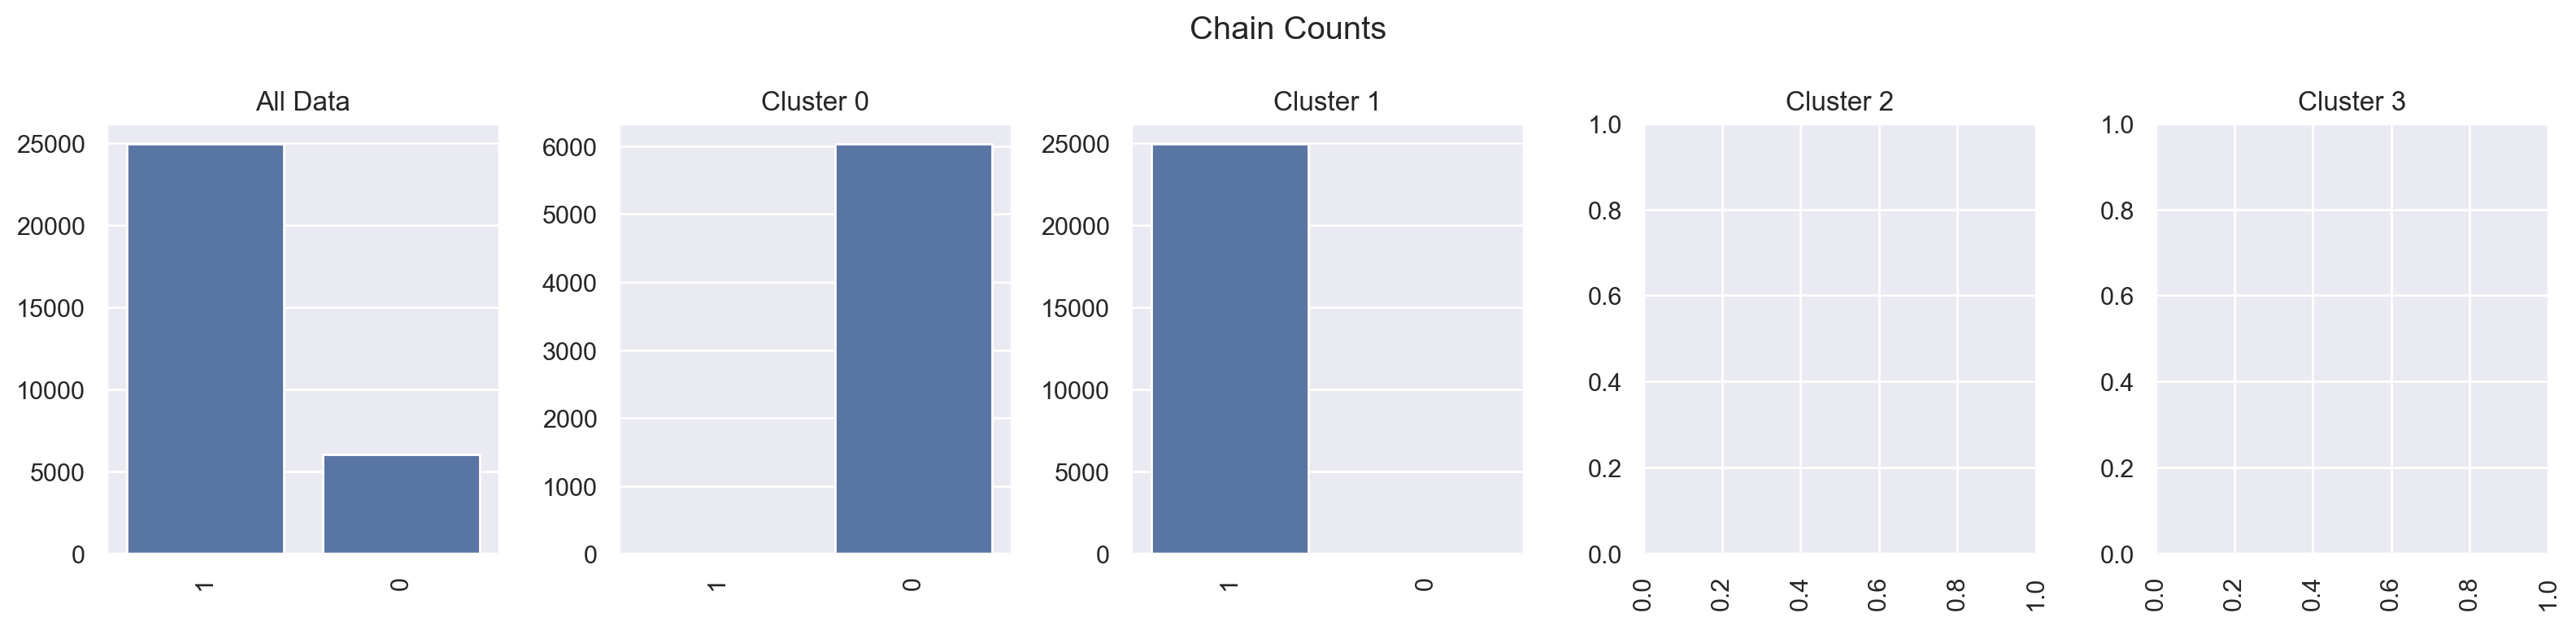

In [2168]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='is_chain', 
                        order = df['is_chain'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['is_chain']==i-1], 
                    x='is_chain', 
                    order = df['is_chain'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Chain Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

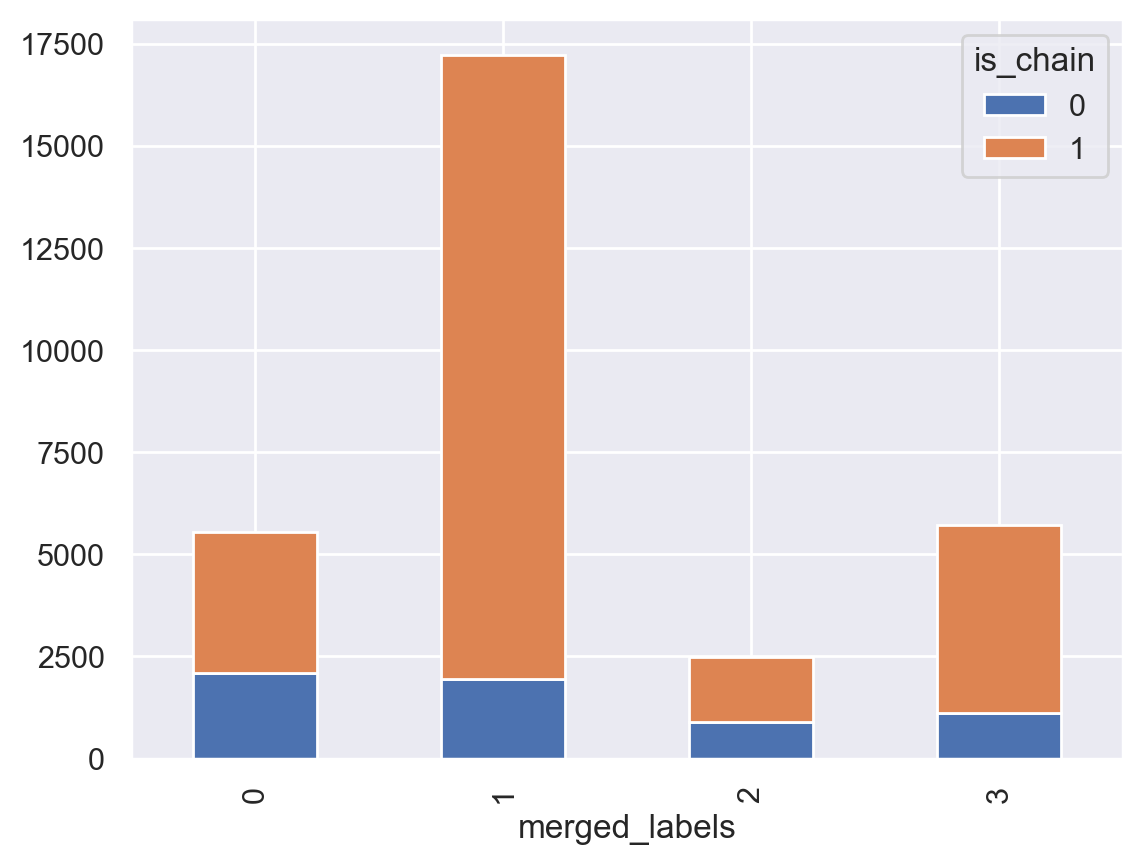

In [2169]:
df_cl_chain = df.groupby([
    "merged_labels", 
    "is_chain",
    ])['is_chain'].size().unstack()

df_cl_chain


df_cl_chain.plot.bar(stacked=True)

<Axes: xlabel='merged_labels'>

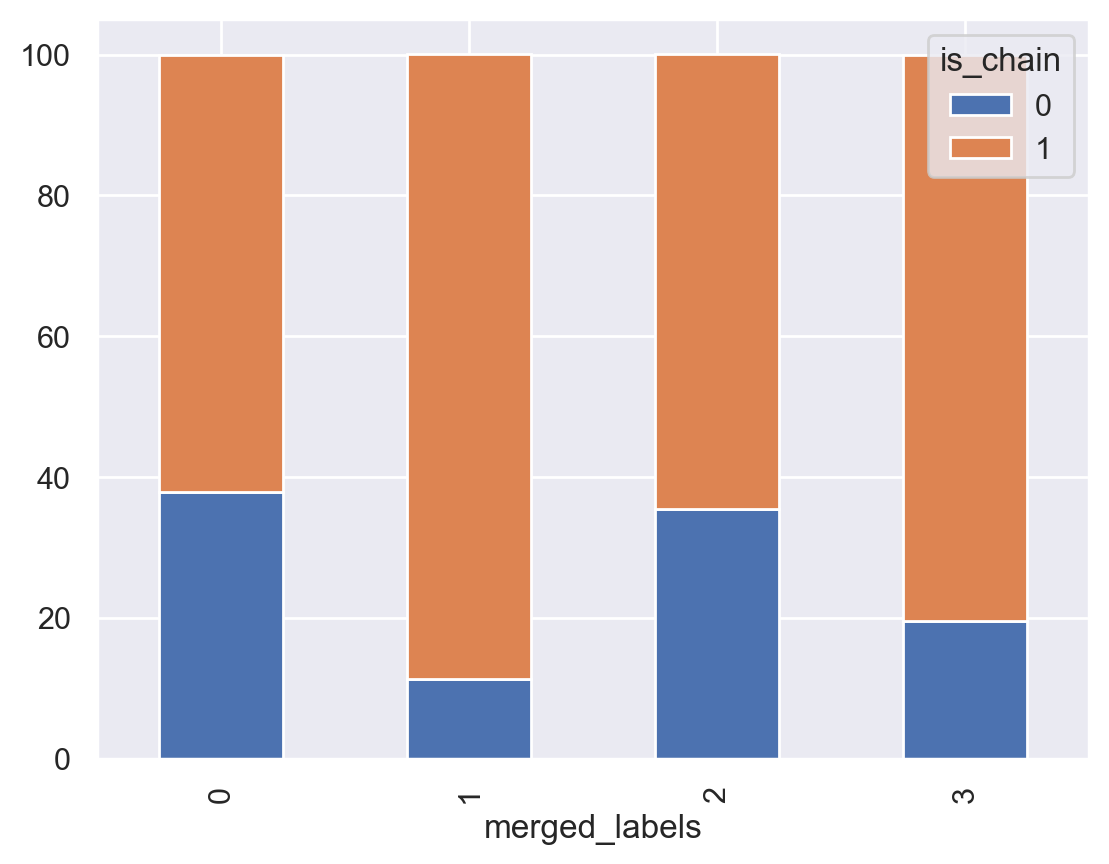

In [2170]:
df_cl_chain_pct = df_cl_chain.copy()
for i in df['is_chain'].unique():
    df_cl_chain_pct[i] = 100*df_cl_chain_pct[i]/df['merged_labels'].value_counts().sort_index().values

df_cl_chain_pct.plot.bar(stacked=True)

## Payment Method

In [2171]:
df_pay = df[['merged_labels',
            'enc_payment_method_CARD',
       'enc_payment_method_CASH', 'enc_payment_method_DIGI',
]].groupby(['merged_labels']).sum()

df_pay

enc_payment_method_CARD  enc_payment_method_CASH  enc_payment_method_DIGI
merged_labels                                                                           
0                       2282.0                  1749.0                   1502.0         
1                      12283.0                  2161.0                   2790.0         
2                       1061.0                   789.0                    642.0         
3                       3876.0                   811.0                   1025.0

In [2172]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     5533
1    17234
2     2492
3     5712
Name: count, dtype: int64

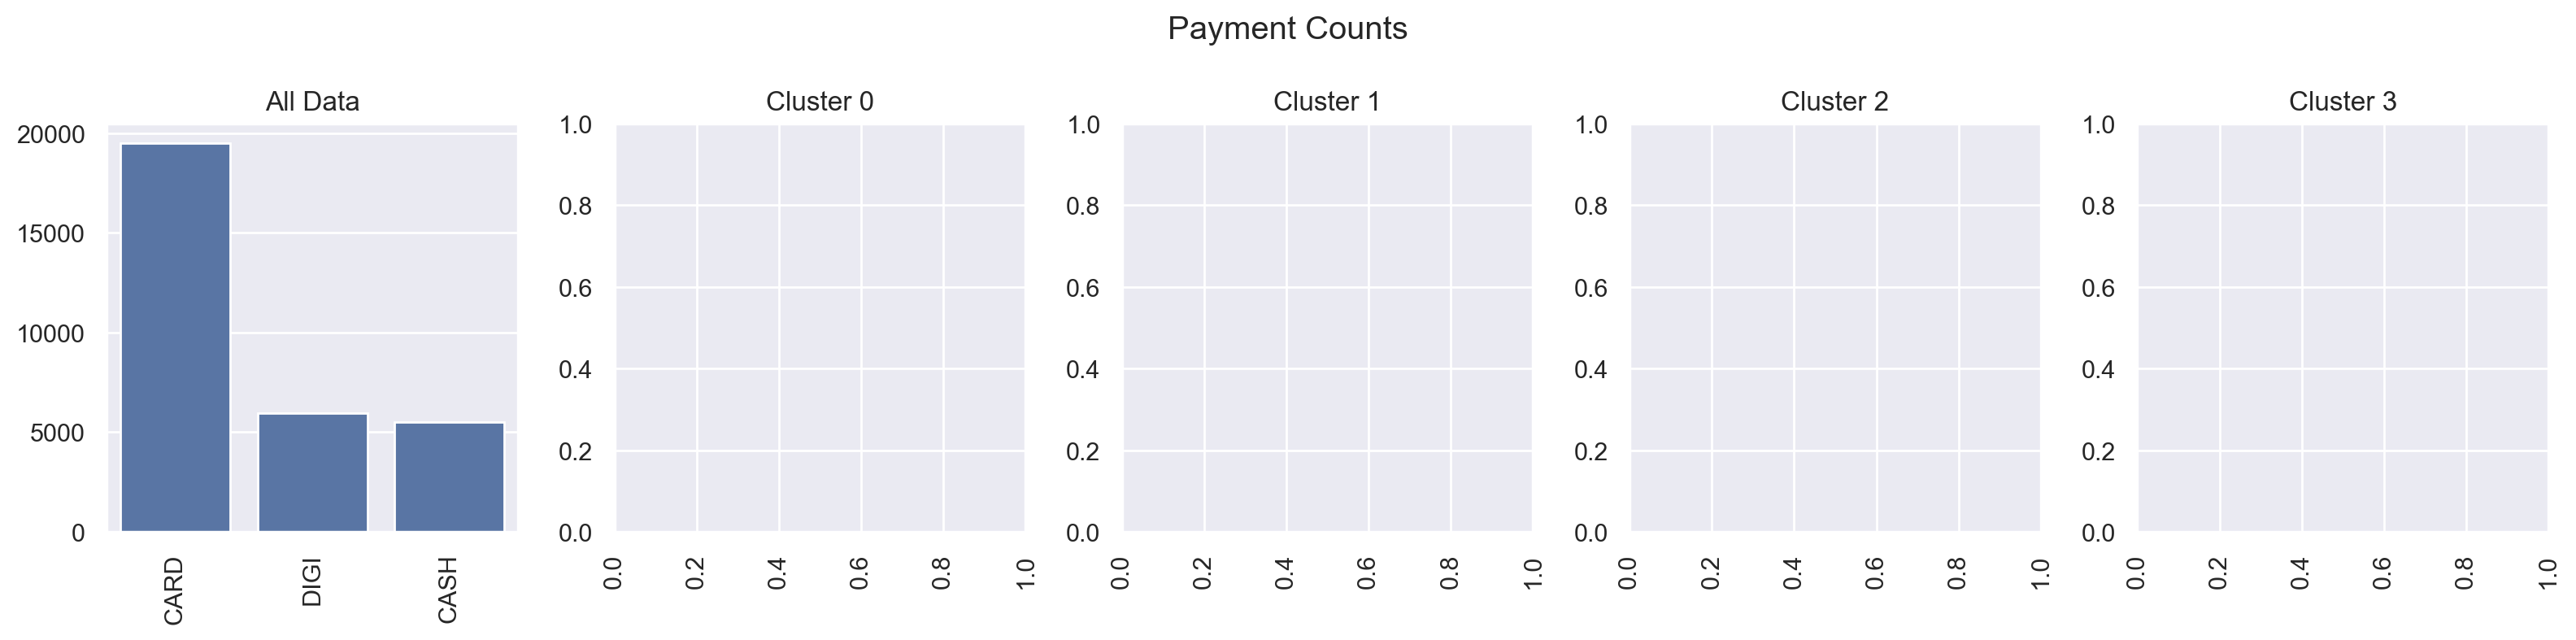

In [2173]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='payment_method', 
                        order = df['payment_method'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['payment_method']==i-1], 
                    x='payment_method', 
                    order = df['payment_method'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Payment Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

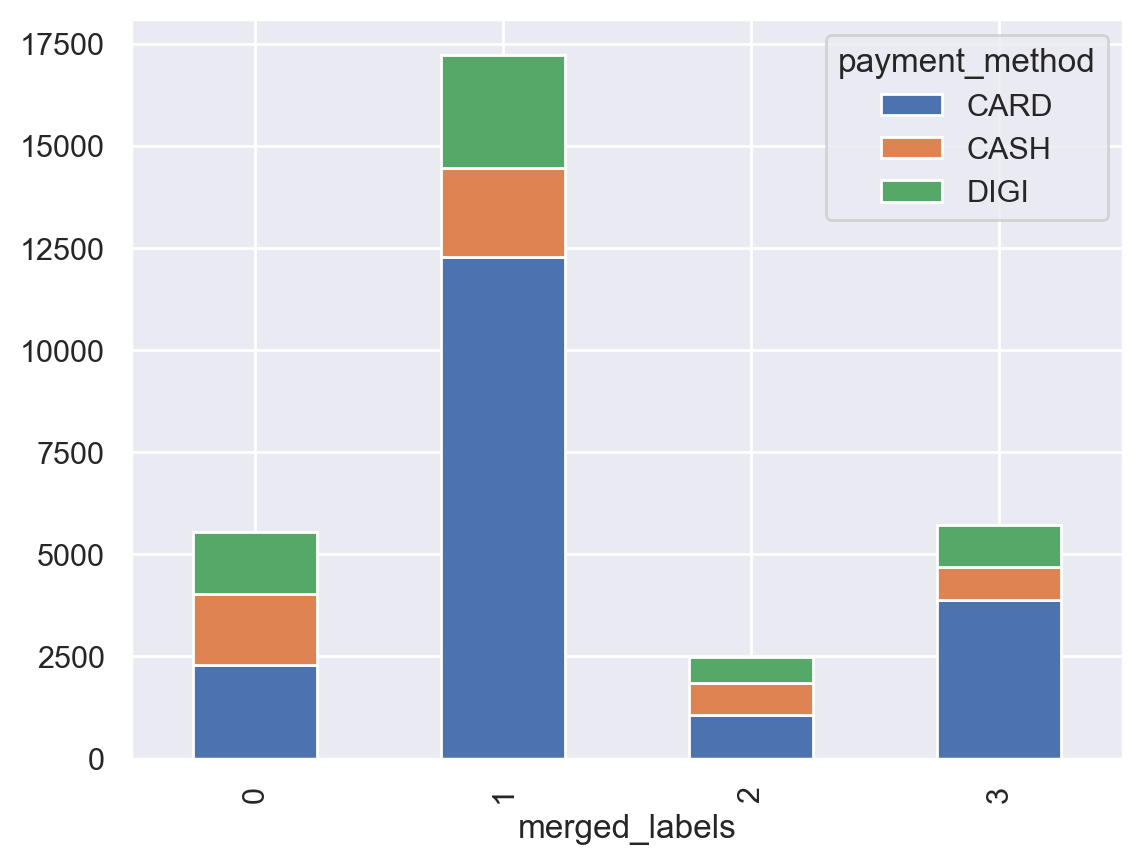

In [2174]:
df_cl_pay = df.groupby([
    "merged_labels", 
    "payment_method",
    ])['payment_method'].size().unstack()

df_cl_pay


df_cl_pay.plot.bar(stacked=True)

<Axes: xlabel='merged_labels'>

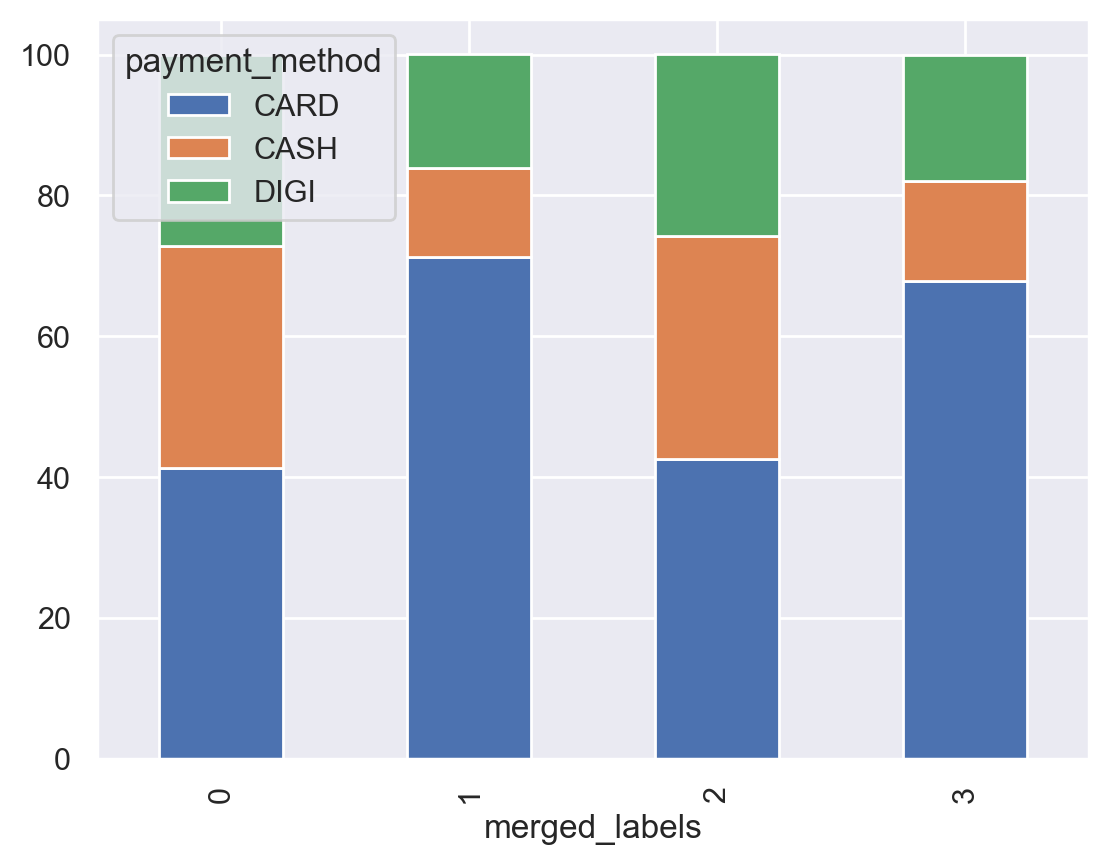

In [2175]:
df_cl_pay_pct = df_cl_pay.copy()
for i in df['payment_method'].unique():
    df_cl_pay_pct[i] = 100*df_cl_pay_pct[i]/df['merged_labels'].value_counts().sort_index().values

df_cl_pay_pct.plot.bar(stacked=True)

## Age Group

In [2176]:
df_age = df[['merged_labels',
            'enc_age_group',
       
]].groupby(['merged_labels']).sum()

df_age

enc_age_group
merged_labels               
0                  6798.0   
1                 21338.0   
2                  3123.0   
3                  7098.0

In [2177]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     5533
1    17234
2     2492
3     5712
Name: count, dtype: int64

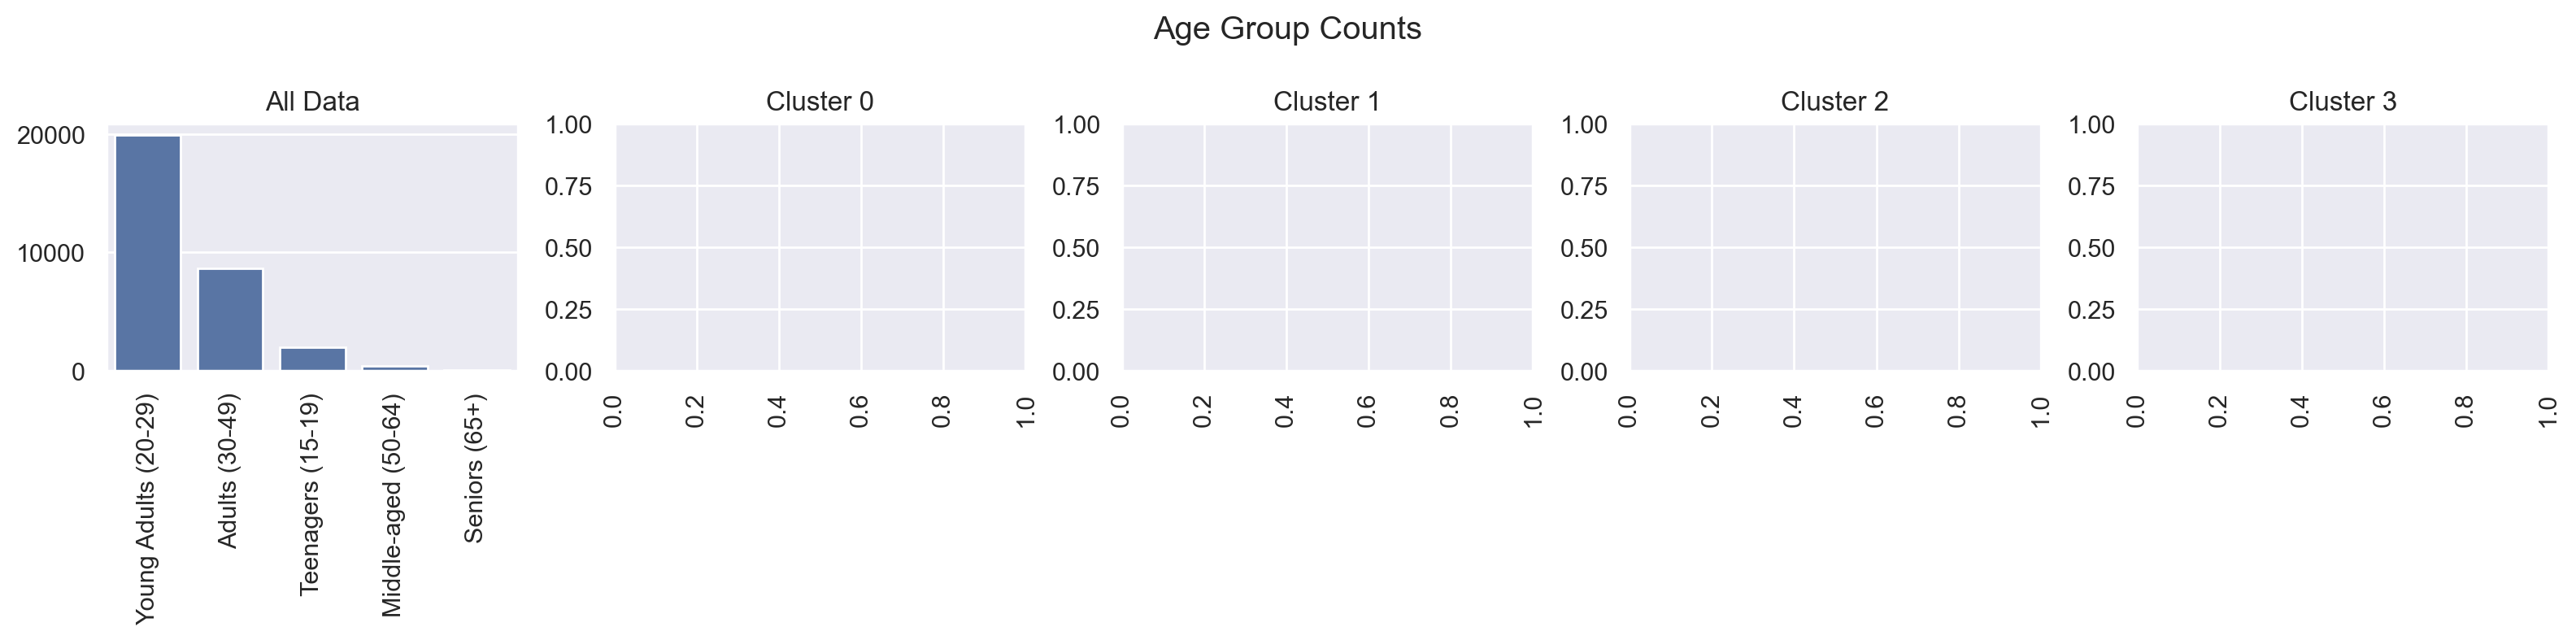

In [2178]:
fig, axes = plt.subplots(1, 
                         df['merged_labels'].nunique() + 1, # Add an extra ax for population countplot
                         figsize=(16,4),
                         tight_layout=True,
                        #  sharey=True,
                         )


for i in range(len(axes.flatten())): 
    ax = axes[i]
    if i == 0:
        sns.countplot(df, 
                        x='age_group', 
                        order = df['age_group'].value_counts().index,
                        ax=ax)
        ax.set_title("All Data")
        
    else:    
        sns.countplot(df.loc[df['age_group']==i-1], 
                    x='age_group', 
                    order = df['age_group'].value_counts().index,
                    ax=ax)
        ax.set_title("Cluster {}".format(i-1))
    
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Age Group Counts", )
plt.show()

<Axes: xlabel='merged_labels'>

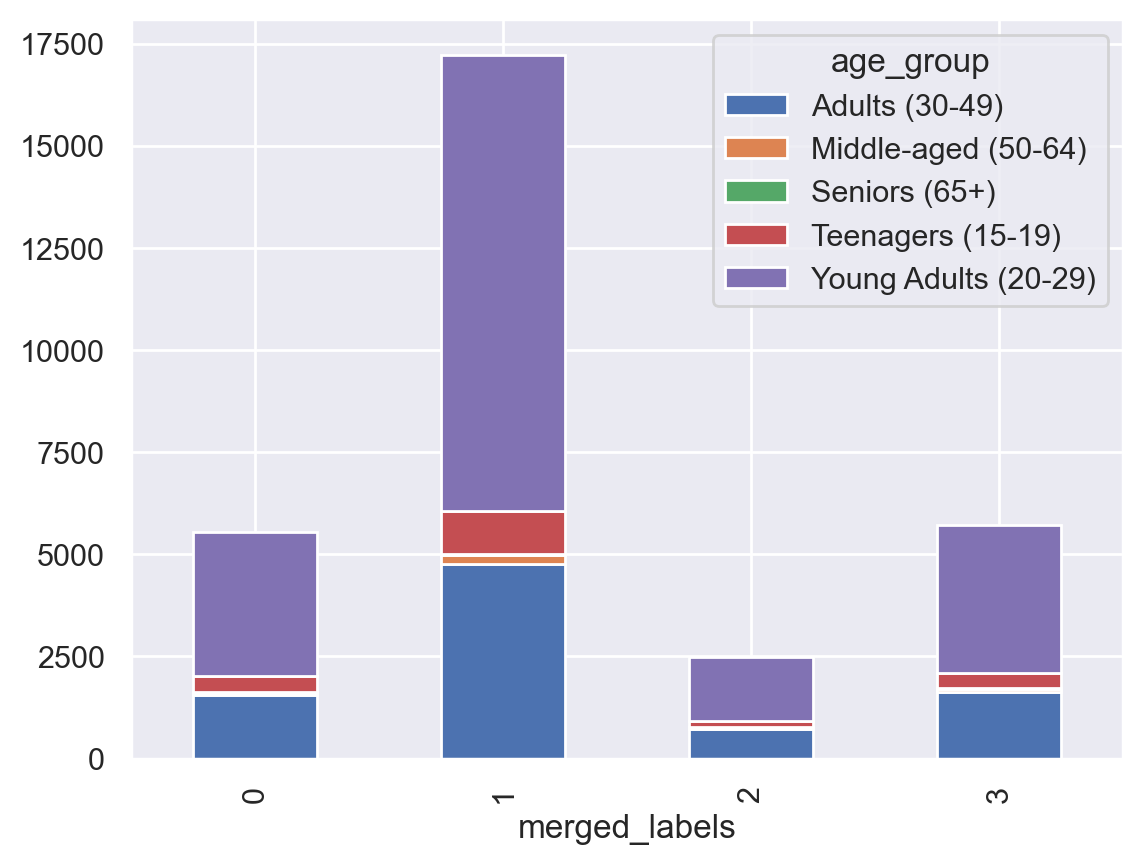

In [2179]:
df_cl_age = df.groupby([
    "merged_labels", 
    "age_group",
    ])['age_group'].size().unstack()

df_cl_age


df_cl_age.plot.bar(stacked=True)

<Axes: xlabel='merged_labels'>

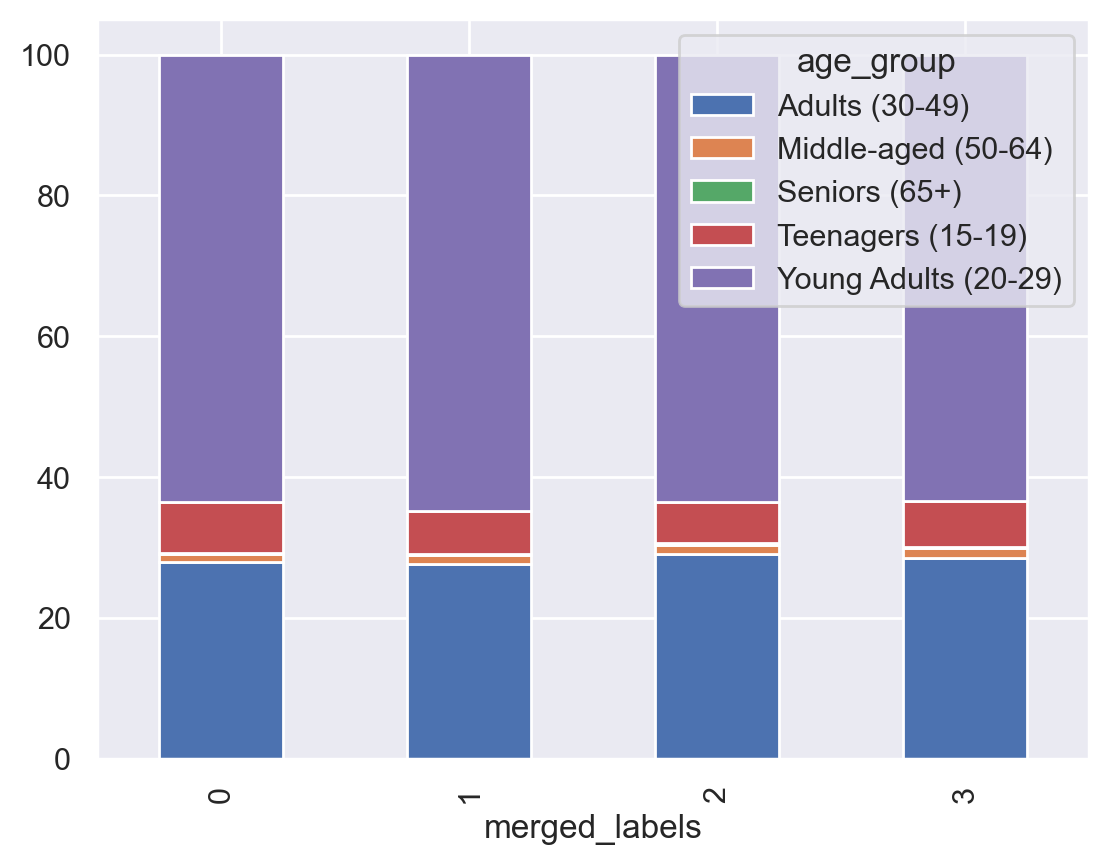

In [2180]:
df_cl_age_pct = df_cl_age.copy()
for i in df['age_group'].unique():
    df_cl_age_pct[i] = 100*df_cl_age_pct[i]/df['merged_labels'].value_counts().sort_index().values

df_cl_age_pct.plot.bar(stacked=True)

## Cuisine Types

In [2184]:
# Load the previously saved scaler
scaler = joblib.load('scaler.pkl')

In [ ]:
# variables related to spending are:
spending_cols = [
    'Main Courses',
    'Snacks and Street Food',
    'Desserts and Beverages',
    'Healthy and Special Diets',
    'Other'
]

# Group by clusters and calculate descriptive statistics
cluster_profile = df.groupby('merged_labels')[spending_cols].agg(['mean', 'std', 'min', 'max', 'median'])

# Apply the inverse transform as before
df_spending_scaled = df[spending_cols]

# Get the scaler's mean and scale only for the spending columns
mean_spending = scaler.mean_[df.columns.get_loc(spending_cols[0]):df.columns.get_loc(spending_cols[-1]) + 1]
scale_spending = scaler.scale_[df.columns.get_loc(spending_cols[0]):df.columns.get_loc(spending_cols[-1]) + 1]

# Manually reverse the scaling for the specific columns (spending_cols)
df_spending_original = (df_spending_scaled * scale_spending) + mean_spending

# Replace the scaled columns in the original DataFrame
df[spending_cols] = df_spending_original

# Calculate the cluster profile with the original spending values
cluster_profile_original = df.groupby('merged_labels')[spending_cols].agg(['mean', 'std', 'min', 'max', 'median'])

# Display the cluster profile with the original spending values
cluster_profile_original.head()



Main Courses                                         Snacks and Street Food                                          Desserts and Beverages                                          Healthy and Special Diets                                            Other                                           
                  mean        std       min       max      median           mean             std       min       max       median           mean             std       min       max       median             mean              std       min       max       median     mean      std       min       max       median 
merged_labels                                                                                                                                                                                                                                                                                                           
0               0.646936    0.340816  0.341793  3.200250  0.543728        1.030827         0.617539  0.847378   6.658453  0.847378        1.133252         0.601291  0.974891   9.075556  0.974891          1.143870          0.409089  1.090162   8.518779  1.090162  1.167083  0.540445  1.031398  11.783319  1.031398
1               1.297428    0.952654  0.341793  7.936333  1.011567        1.223065         0.992836  0.847378  13.071036  0.847378        1.382089         1.108359  0.974891  18.009362  0.974891          1.321772          1.145505  1.090162  26.520451  1.090162  1.553876  1.321926  1.031398  20.577993  1.031398
2               0.662672    0.336954  0.341793  2.510407  0.561288        0.995632         0.529983  0.847378   6.467571  0.847378        1.142415         0.616199  0.974891   8.595196  0.974891          1.147813          0.451982  1.090162   9.474688  1.090162  1.157022  0.439590  1.031398   5.632359  1.031398
3               0.945910    0.607087  0.341793  5.300821  0.780156        1.089933         0.737103  0.847378   9.605644  0.847378        1.226771         0.763316  0.974891  10.451182  0.974891          1.197969          0.707746  1.090162  18.584854  1.090162  1.240393  0.707080  1.031398  11.042371  1.031398

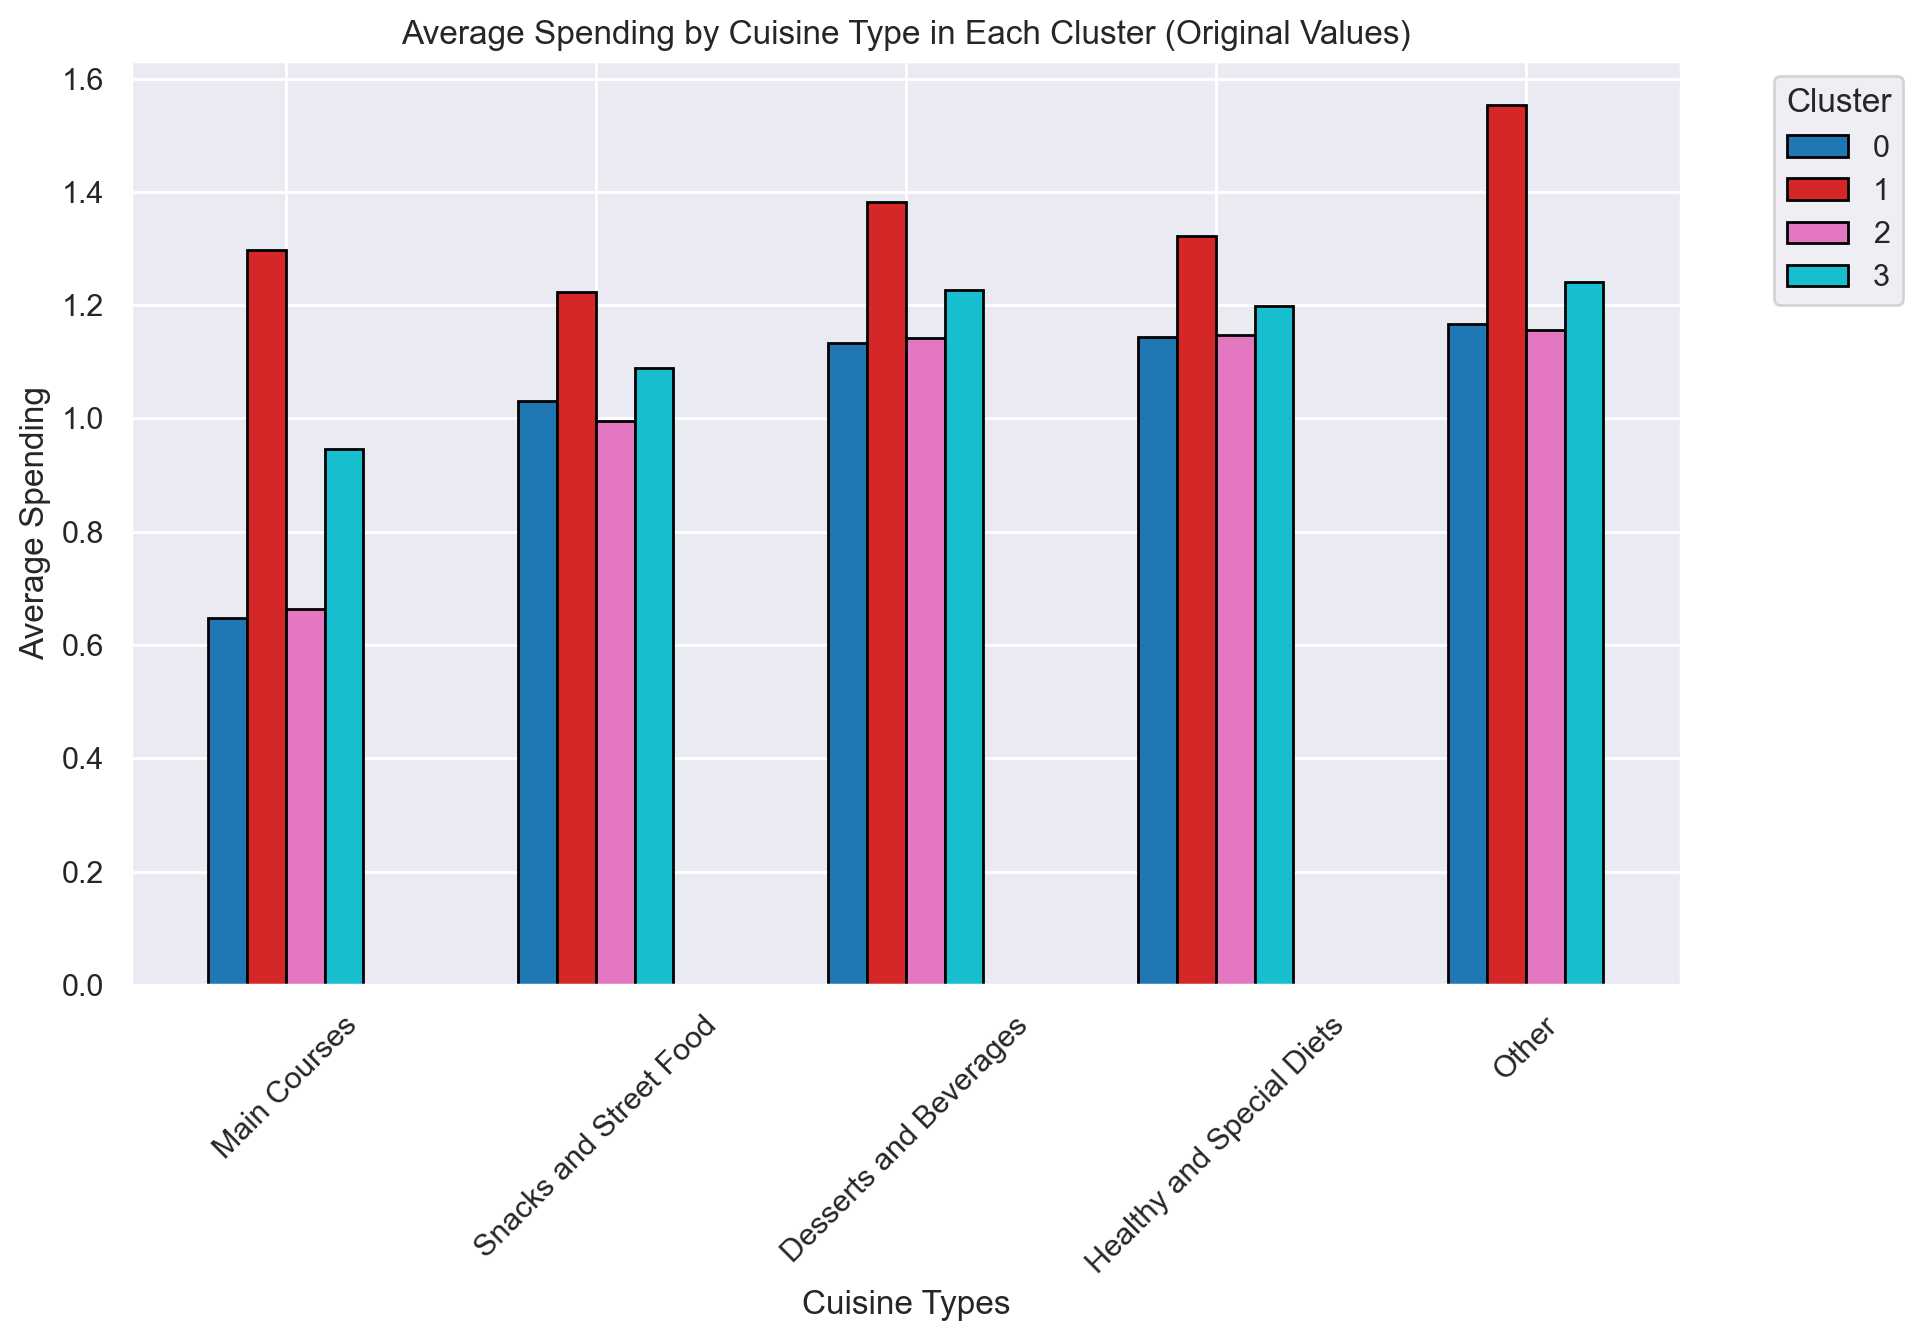

In [2199]:
# Get the mean values for the non-scaled spending columns
cluster_means_original = cluster_profile_original.xs('mean', axis=1, level=1)

# Plot the grouped bar chart for the original (non-scaled) values
cluster_means_original.T.plot(kind='bar', figsize=(10, 6), colormap='tab10', edgecolor='black')
plt.title('Average Spending by Cuisine Type in Each Cluster (Original Values)')
plt.xlabel('Cuisine Types')
plt.ylabel('Average Spending')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()





## Time Period

In [2194]:
# variables related to time are:
time_cols = [
'early_morning(0h-5h)',
 'morning(6h-11h)',
 'afternoon(12h-17h)',
 'night(18h-23h)'
]

# Group by clusters and calculate descriptive statistics
cluster_profile_t = df.groupby('merged_labels')[time_cols].agg(['mean', 'std', 'min', 'max', 'median'])

# Apply the inverse transform as before
df_time_scaled = df[time_cols]

# Get the scaler's mean and scale only for the time columns
mean_time = scaler.mean_[df.columns.get_loc(time_cols[0]):df.columns.get_loc(time_cols[-1]) + 1]
scale_time = scaler.scale_[df.columns.get_loc(time_cols[0]):df.columns.get_loc(time_cols[-1]) + 1]

# Manually reverse the scaling for the specific columns (time_cols)
df_time_original = (df_time_scaled * scale_time) + mean_time

# Replace the scaled columns in the original DataFrame
df[time_cols] = df_time_original

# Calculate the cluster profile with the original time values
cluster_profile_original_t = df.groupby('merged_labels')[time_cols].agg(['mean', 'std', 'min', 'max', 'median'])

# Display the cluster profile with the original time values
cluster_profile_original_t.head()

early_morning(0h-5h)                                         morning(6h-11h)                                          afternoon(12h-17h)                                         night(18h-23h)                                         
                      mean            std       min       max      median        mean         std       min       max       median         mean           std       min       max      median       mean         std       min       max       median 
merged_labels                                                                                                                                                                                                                                         
0                   0.784219        3.531256 -0.621849  9.951816 -0.621849     1.035158     6.789129 -3.025381  12.921909 -3.025381      0.882476       5.639477 -3.921019  7.766187 -3.921019    1.070785     6.722256 -2.371574  14.721028 -2.371574
1                   0.630093        2.636859 -0.621849  9.951816 -0.621849     1.299134     4.760600 -3.025381  12.921909  0.164077      0.864199       3.902840 -3.921019  7.766187  0.574060    1.063729     4.667223 -2.371574  14.721028 -2.371574
2                   0.921982        3.625379 -0.621849  9.951816 -0.621849     1.645324     6.968352 -3.025381  12.921909 -3.025381      0.757928       5.536505 -3.921019  7.766187 -3.921019    0.376252     6.062825 -2.371574  14.721028 -2.371574
3                   0.831977        2.909964 -0.621849  9.951816 -0.621849     1.233330     5.251099 -3.025381  12.921909 -3.025381      0.748253       4.384123 -3.921019  7.766187  1.087784    0.564528     4.852866 -2.371574  14.721028 -2.371574

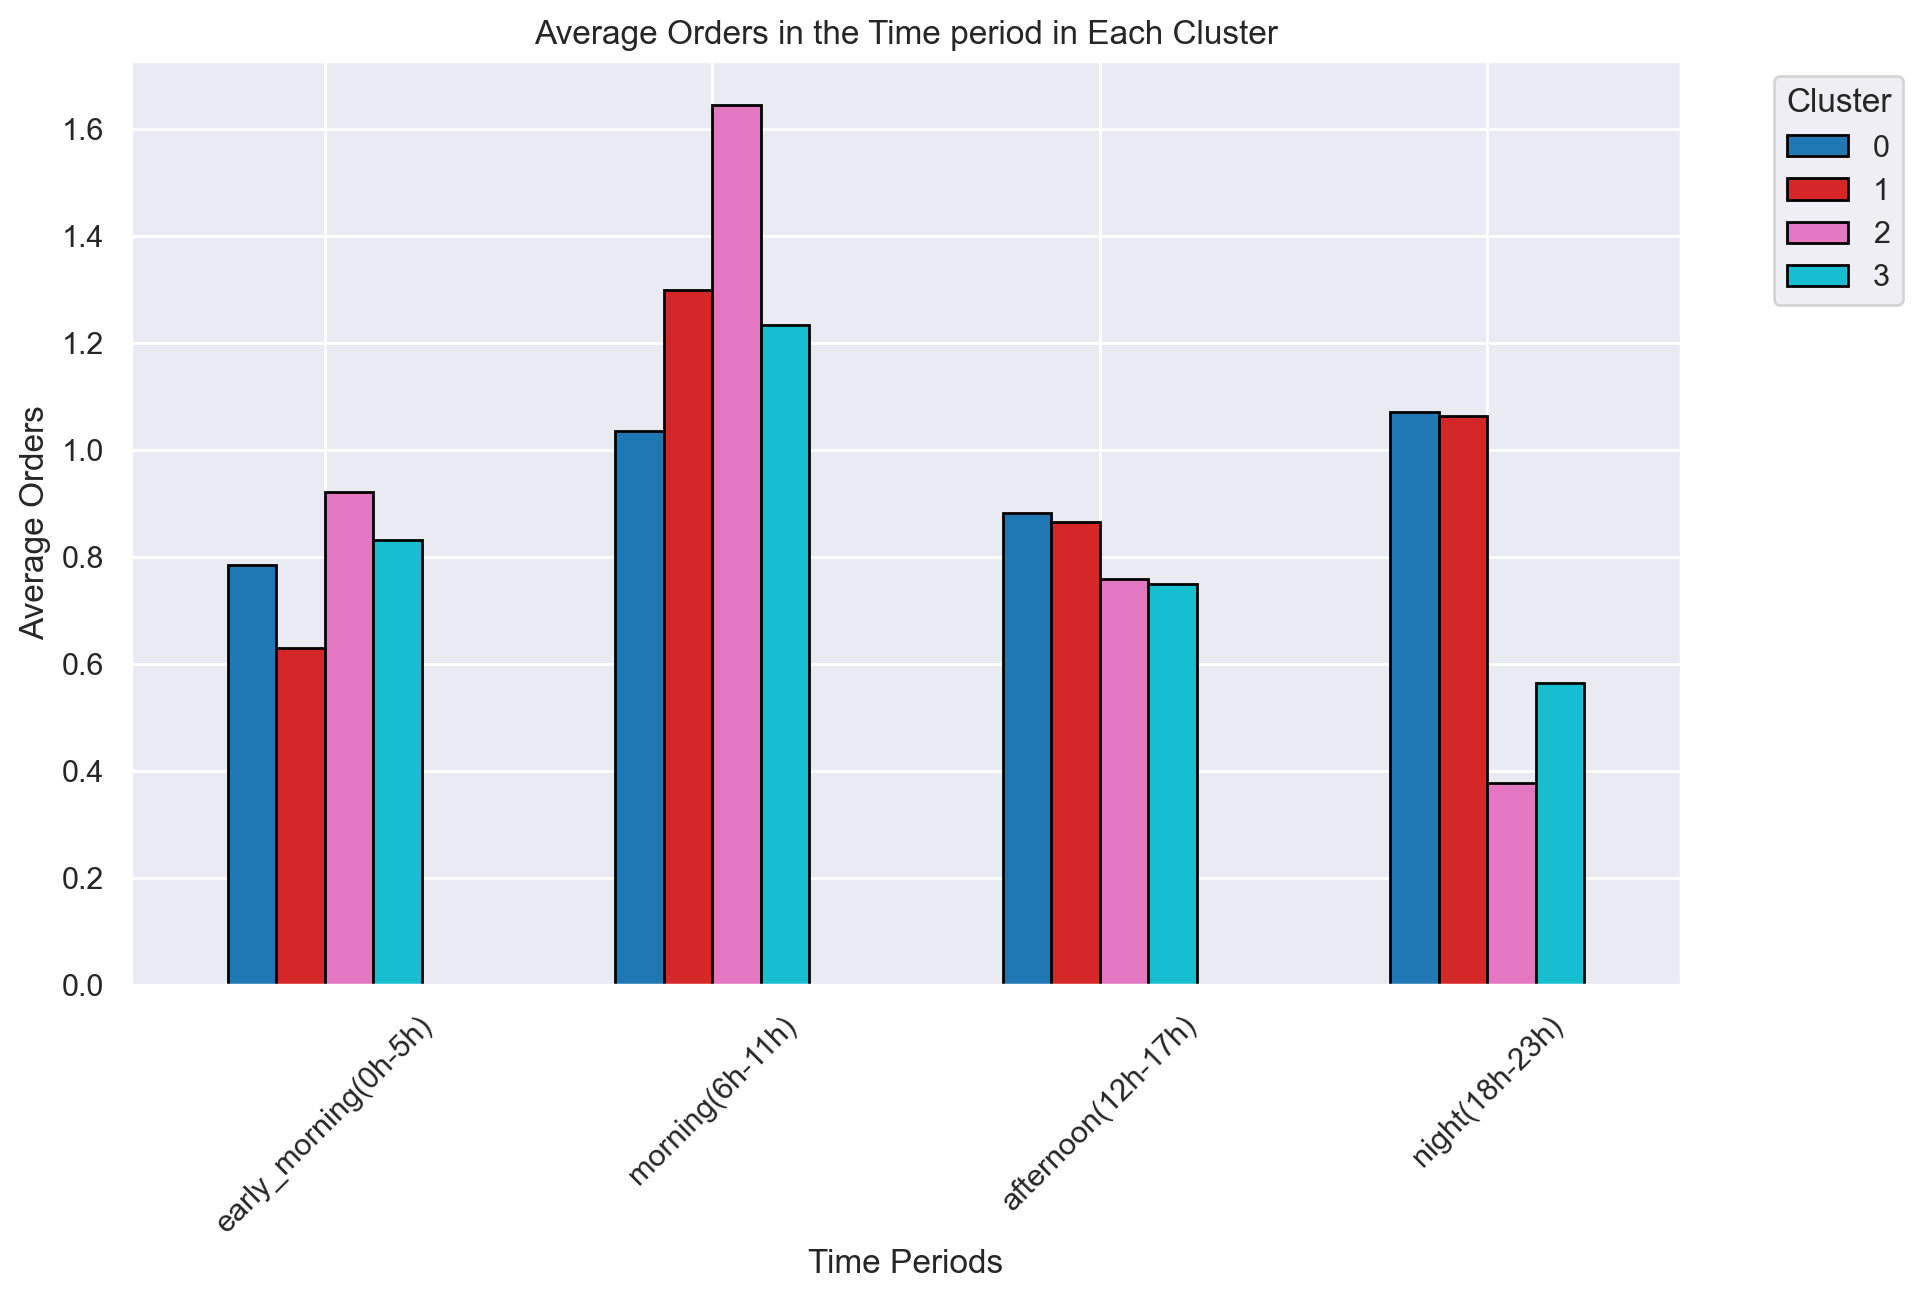

In [2195]:
# Calculate means
cluster_means_time = df.groupby('merged_labels')[time_cols].mean()

# Plot the grouped bar chart
cluster_means_time.T.plot(kind='bar', figsize=(10, 6), colormap='tab10', edgecolor='black')
plt.title('Average Orders in the Time period in Each Cluster')
plt.xlabel('Time Periods')
plt.ylabel('Average Orders')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


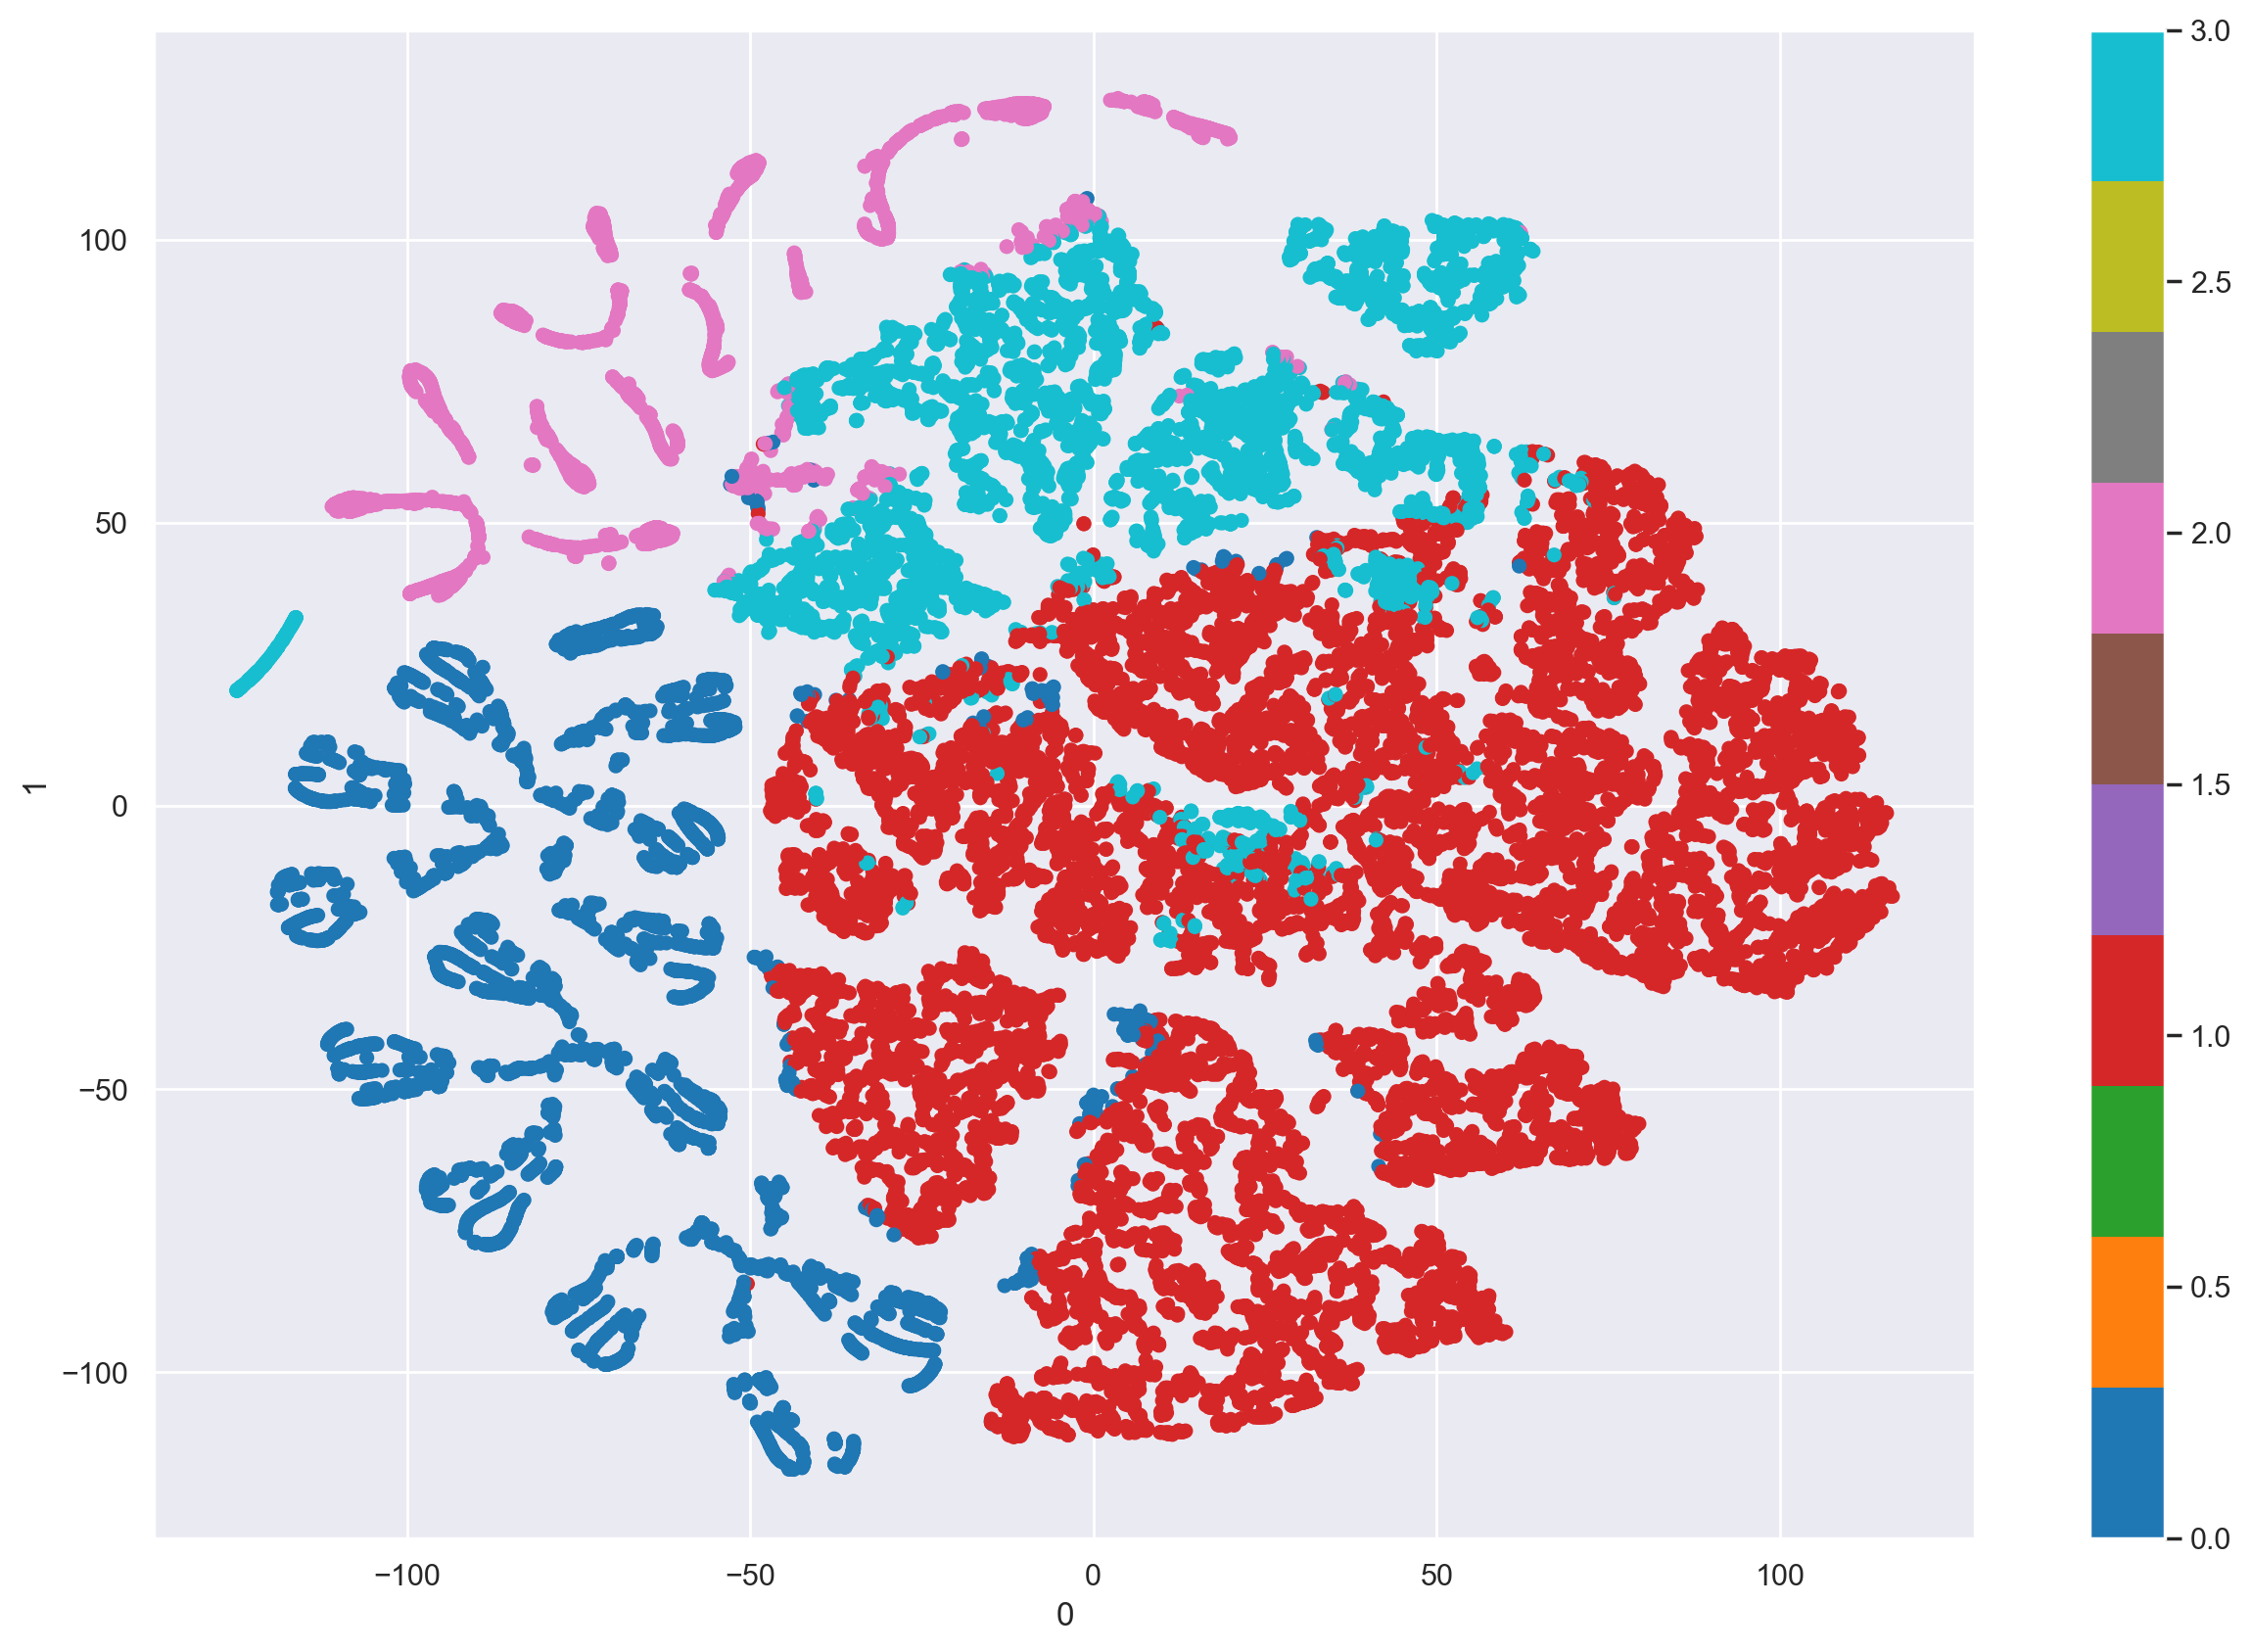

In [2196]:
two_dim = TSNE(random_state=42).fit_transform(df[metric_features])

pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()


# ------

In [1153]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df[metric_features + ['merged_labels']], 'merged_labels').drop('merged_labels')

In [ ]:
# Preparing the data
X = df[metric_features]
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))


# Performance on training data
train_score = dt.score(X_train, y_train)
# Performance on test data
test_score = dt.score(X_test, y_test)

print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Test Accuracy: {test_score * 100:.2f}%")


In [ ]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Predicting the cluster labels of the outliers
df_out['merged_labels'] = dt.predict(df_out[metric_features])
df_out.head()

In [1158]:
# Concatenate df_out with the predicted 'merged_labels' back to the original df
df = pd.concat([df, df_out[['merged_labels']]], axis=0)
